# Introducción

El movimiento **Open Gov Data** defiende la publicación abierta, regular y reutilizable de los datos de las administraciones públicas de un gobierno con el objetivo de facilitar a sus ciudadanos el acceso a la información.

De esta forma, se genera confianza en las instituciones porque se expone su trabajo y se muestra cómo gestionan e invierten los recursos públicos, además de ayudar al desarrollo económico, a la generación de nuevos sectores y/o servicios para la ciudadanía.

Siguiendo esta iniciativa, el **Ayuntamiento de Madrid** dispone del [Portal de Datos Abiertos](https://datos.madrid.es/portal/site/egob/) donde podemos encontrar una gran cantidad de datasets de diferentes sectores: demografía, transporte, salud, empleo, comercio, ocio y cultura...

Para la realización de este proyecto, hemos optado por analizar un dataset sobre los [accidentes de tráfico de la ciudad de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default) registrados por la Policía Municipal desde 2010 hasta hoy.

Por cada accidente, este dataset contiene un registro muy detallado: fecha, hora, dirección, tipo de accidente, tipos de vehículos implicados, número de víctimas, etc.

Analizar esta información puede resultar realmente útil para mejorar la seguridad, reducir el número de accidentes y víctimas e incluso llegar a prevenirlos. Por ejemplo, algunas preguntas que podemos plantearnos serían:

* ¿Cuáles son los tipos de accidentes más frecuentes en cada barrio?
* ¿En qué calles se producen más atropellos a peatones y ciclistas?
* ¿En qué lugar, hora y/o día de la semana hay más accidentes?
* ¿En qué cruces las colisiones entre vehículos son letales?
* ¿Cuál es la tendencia del nº total de colisiones de un año a otro? ¿Qué podemos predecir para 2020?

# Objetivos

Para tratar de responder a las preguntas anteriores, llevaremos a cabo los siguientes objetivos:

1. Confeccionar un dataset específico para el estudio de los accidentes de tráfico de Madrid:

  Los datos proporcionados por el Portal del Datos Abiertos requieren un preprocesamiento previo y, por otro lado, tampoco incluyen información sobre el barrio, código postal ni coordenadas geográficas del lugar del accidente.

2. Realizar un análisis exploratorio para obtener una visión general de los accidentes de tráfico en Madrid.

3. Crear un [mapa interactivo](https://tabsoft.co/3eL0Jzr) de la ciudad de Madrid para explorar los accidentes de tráfico:   

  Visualizar los datos en un mapa nos permite identificar rápidamente qué regiones o puntos concentran un mayor número de accidentes de tráfico.

# Información del dataset

El dataset no se encuentra en un único fichero, sino que existe uno para cada año desde 2010 hasta 2020.

También se debe tener en cuenta la siguiente información que nos comunican desde el portal:

* Se incluye **un registro por persona implicada** en el accidente.
* En el año **2019 y posteriores**:
  * La **estructura de datos varía** respecto a los años anteriores
  * No se incluyen registros de testigos
* Los **ficheros de 2010 a 2018** solo registran los accidentes con heridos o con daños al patrimonio municipal.
* Los **datos publicados son provisionales hasta seis meses después del año vencido**.
* Actualmente **no se dispone de datos por barrio**.
* **Estructura del fichero de datos** de accidentes de tráfico (PDF):
  *  [2019-](https://datos.madrid.es/FWProjects/egob/Catalogo/Seguridad/Ficheros/Estructura_DS_Accidentes_trafico_desde_2019.pdf)
  * [2010-2018](https://datos.madrid.es/FWProjects/egob/Catalogo/Seguridad/Ficheros/Estructura_DS_Accidentes_trafico_2010_2018.pdf)

En nuestro caso, utilizaremos los ficheros desde 2010 hasta 2018 sin incluir los de los años posteriores ya que la estructura de datos es diferente y los datos publicados son provisionales.

## Carga de datos

En el portal se muestran los ficheros separados por año, vamos a cargar todos ellos en un único dataset que incluya todos los registros desde 2010 hasta 2018:

In [ ]:
# Importamos librerías necesarias
import pandas as pd
import requests
from io import StringIO
from matplotlib import pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

# Configuramos ancho de columnas de los dataframes
pd.set_option('max_colwidth', 400)

In [ ]:
# Creamos una función para eliminar posibles espacios en columnas de texto
def df_strip(df):
  df_obj = df.select_dtypes(['object'])
  df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip().str.upper())
  return df

**Aviso**: El código de la siguiente celda se ha marcado como comentario porque tarda unos minutos en descargar y unificar los 9 datasets. <br> Por esta razón, para evitar tiempo de espera, se ha almacenado el dataset unificado en la nube para utilizarse durante el resto del proyecto.

In [ ]:
# URL genérica que contiene la dirección para descargar cada dataset
#url = 'https://datos.madrid.es/egob/catalogo/300228-{year}-accidentes-trafico-detalle.csv'

# Creamos dataset inicial con los datos de 2010
#raw_data = pd.read_csv(url.format(year=10), delimiter=';', encoding='latin-1')

# Cargamos resto de datasets (2011-2018) y lo añadimos al dataset inicial
#for year in range(11,19):
#  df = pd.read_csv(url.format(year=year), delimiter=';', encoding='latin-1')
#  raw_data = pd.concat([raw_data, df], ignore_index=True)

# Guardamos dataset en fichero CSV para descargar en local
#raw_data.to_csv('accidentes_2010_2018.csv', sep=';', encoding='latin-1', index=False)

# Ruta temporal donde se ha guardado el fichero
#path = '/content/accidentes_2010_2018.csv'

# Cargamos dataset unificado
#raw_data = pd.read_csv(path, delimiter=';', encoding='latin-1')

In [ ]:
# Cargamos dataset unificado (almacenado en Google Drive)
url = requests.get('https://drive.google.com/uc?export=download&id=1FP8tcko5cBSMKHJEnvNHi27MVPM5A3Ay')
csv_raw = StringIO(url.text)
raw_data = pd.read_csv(csv_raw, delimiter=';', encoding='latin-1')

# Eliminamos espacios en columnas de texto
accidentes = df_strip(raw_data)

In [ ]:
# Examinamos dataset
accidentes

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve,CPSV Mojada,CPSV Aceite,CPSV Barro,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,Nº VICTIMAS *,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad,Nº VICTIMAS *,* Nº VICTIMAS
0,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,1.0,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS,NaN,NaN
1,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,1.0,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54 AÑOS,NaN,NaN
2,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,1.0,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44 AÑOS,NaN,NaN
3,01/01/2010,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200,2010/94,NO,NO,NO,NO,SI,NO,SI,NO,NO,NO,NO,NO,7.0,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS,NaN,NaN
4,01/01/2010,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200,2010/94,NO,NO,NO,NO,SI,NO,SI,NO,NO,NO,NO,NO,7.0,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 30 A 34 ANOS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252993,31/12/2018,DE 21:00 A 21:59,LUNES,SALAMANCA,CALLE DE VELAZQUEZ - CALLE DE VILLANUEVA,0,2019/18,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,NaN,COLISIÓN DOBLE,TURISMO,VIAJERO,HOMBRE,IL,DE 30 A 34 ANOS,NaN,1.0
252994,31/12/2018,DE 21:00 A 21:59,LUNES,SALAMANCA,CALLE DE VELAZQUEZ - CALLE DE VILLANUEVA,0,2019/18,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,NaN,COLISIÓN DOBLE,AUTO-TAXI,CONDUCTOR,HOMBRE,IL,DE 40 A 44 AÑOS,NaN,1.0
252995,31/12/2018,DE 23:00 A 23:59,LUNES,HORTALEZA,CALLE DE JOAQUIN FERNANDEZ LEIVA - CALLE DE SILVANO,0,2019/53,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,NaN,OTRAS CAUSAS,TURISMO,CONDUCTOR,MUJER,IL,DE 21 A 24 AÑOS,NaN,1.0
252996,31/12/2018,DE 23:00 A 23:59,LUNES,HORTALEZA,CALLE DE JOAQUIN FERNANDEZ LEIVA - CALLE DE SILVANO,0,2019/53,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,NaN,OTRAS CAUSAS,TURISMO,CONDUCTOR,HOMBRE,HL,DE 50 A 54 AÑOS,NaN,1.0


Tras unificar los 9 datasets en uno único, observamos que hay 252998 registros de accidentes y 28 columnas.

Sin embargo, tras echar un vistazo al dataset detectamos varios problemas:

1. Existen registros donde no coincide el año de la columna `Nº PARTE` y `FECHA`.
2. Existen valores nulos.
3. El dataset no contiene información sobre el **barrio**, **código postal** ni las **coordenadas geográficas** del lugar donde se produjo el accidente, únicamente se añade el **distrito**.<br>
Esta información puede ser importante tenerla en cuenta de cara a **visualizar en un mapa** los puntos donde ocurrieron los accidentes.

A continuación, procederemos a limpiar y preparar el dataset para su posterior análisis:

# Preprocesamiento de datos

## Limpieza del dataset

Tras consultar con el administrador del portal, nos [confirma](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default#26827) que la columna `FECHA` recoge el año en que ocurrió el accidente mientras que la columna `Nº PARTE` el año en el cual se registró el accidente en la aplicación:

In [ ]:
accidentes[['FECHA', 'Nº PARTE']].tail()

,FECHA,Nº PARTE
252993,31/12/2018,2019/18
252994,31/12/2018,2019/18
252995,31/12/2018,2019/53
252996,31/12/2018,2019/53
252997,31/12/2018,2019/53


Para nuestro análisis, nos interesa saber el año en que ocurrió el accidente, por lo tanto, utilizaremos la columna `FECHA`.

A continuación, examinamos las columnas que contienen valores nulos:

In [ ]:
accidentes.isnull().sum()

FECHA                      0
RANGO HORARIO              0
DIA SEMANA                 0
DISTRITO                   0
LUGAR ACCIDENTE            0
Nº                         0
Nº PARTE                   0
CPFA Granizo               0
CPFA Hielo                 0
CPFA Lluvia                0
CPFA Niebla                0
CPFA Seco                  0
CPFA Nieve                 0
CPSV Mojada                0
CPSV Aceite                0
CPSV Barro                 0
CPSV Grava Suelta          0
CPSV Hielo                 0
CPSV Seca Y Limpia         0
Nº VICTIMAS *          59323
TIPO ACCIDENTE             0
Tipo Vehiculo              0
TIPO PERSONA               0
SEXO                       0
LESIVIDAD                  0
Tramo Edad                 0
Nº VICTIMAS *         223797
* Nº VICTIMAS         222876
dtype: int64


Observamos que la columna que representa el **nº de víctimas** aparece 3 veces porque ha tenido 3 nombres diferentes en los datasets que utilizamos.

Esto implica que aparezcan filas con valores nulos (NaN) en aquellas columnas del dataset global que no existen en el dataset que se añade al conjunto.

Si sumamos el número de valores no nulos de esas 3 columnas comprobamos que coincide con el nº total de registros (252998):

In [ ]:
accidentes[['* Nº VICTIMAS','Nº VICTIMAS * ','Nº VICTIMAS *']].notnull().sum().sum()

252998

En cada fila aparece un valor no nulo en una de las 3 columnas mientras que en las otras 2 tienen un valor nulo, por ejemplo: 1 + NaN + NaN, por tanto, podemos sumar las 3 columnas y guardar el resultado en una nueva columna llamada `Nº VICTIMAS`.

Previamente, convertimos los valores nulos a 0 para poder operar con ellos:

In [ ]:
accidentes.fillna(0, inplace=True)

accidentes['Nº VICTIMAS'] = accidentes['* Nº VICTIMAS']\
+ accidentes['Nº VICTIMAS * '] + accidentes['Nº VICTIMAS *']

Por último, eliminamos las antiguas columnas y realizamos otras pequeñas modificaciones:

In [ ]:
accidentes.drop(['* Nº VICTIMAS', 'Nº VICTIMAS * ', 'Nº VICTIMAS *'],
                axis=1, inplace=True)

accidentes['Nº VICTIMAS'] = accidentes['Nº VICTIMAS'].astype(int)

accidentes.rename(columns={'Tipo Vehiculo':'TIPO VEHICULO',
                           'Tramo Edad':'TRAMO EDAD'}, inplace=True)

accidentes['TRAMO EDAD'] = accidentes['TRAMO EDAD'].str.replace('A[NÑ]OS','').str.strip()

In [ ]:
# Verificamos que no existen valores nulos
accidentes.isnull().sum()

FECHA                 0
RANGO HORARIO         0
DIA SEMANA            0
DISTRITO              0
LUGAR ACCIDENTE       0
Nº                    0
Nº PARTE              0
CPFA Granizo          0
CPFA Hielo            0
CPFA Lluvia           0
CPFA Niebla           0
CPFA Seco             0
CPFA Nieve            0
CPSV Mojada           0
CPSV Aceite           0
CPSV Barro            0
CPSV Grava Suelta     0
CPSV Hielo            0
CPSV Seca Y Limpia    0
TIPO ACCIDENTE        0
TIPO VEHICULO         0
TIPO PERSONA          0
SEXO                  0
LESIVIDAD             0
TRAMO EDAD            0
Nº VICTIMAS           0
dtype: int64

Una vez limpio el dataset, procederemos a geolocalizar los accidentes:


In [ ]:
accidentes.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve,CPSV Mojada,CPSV Aceite,CPSV Barro,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS
0,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20,1
1,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54,1
2,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44,1
3,01/01/2010,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200,2010/94,NO,NO,NO,NO,SI,NO,SI,NO,NO,NO,NO,NO,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29,7
4,01/01/2010,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200,2010/94,NO,NO,NO,NO,SI,NO,SI,NO,NO,NO,NO,NO,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 30 A 34,7


## Geolocalización de accidentes

Para geolocalizar los accidentes utilizaremos la librería [GeoPy](https://geopy.readthedocs.io/en/stable/) que nos permite obtener las coordenadas de una dirección específica utilizando un servicio de geolocalización (*Geocoder*) como puede ser [Google Maps](https://developers.google.com/maps/documentation/geocoding) o [Bing Maps](https://www.microsoft.com/en-us/maps/create-a-bing-maps-key).

Veamos un ejemplo sencillo para geolocalizar la CALLE DE ALCAÑIZ 2 utilizando el servicio [Nominatim](https://nominatim.org/) que obtiene los datos de [Open Street Maps](https://www.openstreetmap.org/) y no requiere el uso de una API:

In [ ]:
from geopy.geocoders import Nominatim

geolocator_osm = Nominatim(user_agent="myGeocoder")

geolocator_osm.geocode('CALLE DE ALCAÑIZ 2, Madrid, Spain', addressdetails=True)

Location(Calle de Alcañiz, Barajas, Madrid, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28001, España, (40.4718614, -3.5886972, 0.0))

Observamos que el Geocoder nos devuelve un objeto tipo Location con el que podremos acceder a diferentes datos:

* address
* altitude
* latitude
* longitude
* point
* raw

In [ ]:
location = geolocator_osm.geocode('CALLE DE ALCAÑIZ 2, Madrid, Spain', addressdetails=True)

print('Dirección:', location.address)
print('Coordenadas:', tuple(location.point))

Dirección: Calle de Alcañiz, Barajas, Madrid, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28001, España
Coordenadas: (40.4718614, -3.5886972, 0.0)


O si queremos acceder a los datos en bruto para obtener otra información como el **barrio**, **código postal**, **distrito**...

In [ ]:
location.raw

{'address': {'city': 'Madrid',
  'city_district': 'Barajas',
  'country': 'España',
  'country_code': 'es',
  'county': 'Comunidad de Madrid',
  'municipality': 'Área metropolitana de Madrid y Corredor del Henares',
  'postcode': '28001',
  'road': 'Calle de Alcañiz',
  'state': 'Comunidad de Madrid',
  'suburb': 'Barajas'},
 'boundingbox': ['40.4713821', '40.47226', '-3.5887022', '-3.5886921'],
 'class': 'highway',
 'display_name': 'Calle de Alcañiz, Barajas, Madrid, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28001, España',
 'importance': 0.51,
 'lat': '40.4718614',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '-3.5886972',
 'osm_id': 72146324,
 'osm_type': 'way',
 'place_id': 103587173,
 'type': 'residential'}

Sin embargo, **los datos obtenidos con Nominatim no suelen ser muy precisos**, como hemos podido comprobar en este ejemplo, donde la dirección devuelta no tiene en cuenta el número de la calle. 

Por esta razón, vamos a utilizar conjuntamente los servicios de **Google Maps y Bing Maps** para asegurarnos obtener unos datos correctos:

* Bing Maps devuelve el barrio.
* Algunas direcciones son detectadas correctamente con Google Maps y otras con Bing Maps.
* Podemos contrastar los datos en caso que el resultado obtenido no sea preciso en uno de los 2 servicios.

In [ ]:
from geopy.geocoders import GoogleV3, Bing
from geopy.extra.rate_limiter import RateLimiter

# Geocoder Google Maps
geolocator_google = GoogleV3(api_key='')
geocode_google = RateLimiter(geolocator_google.geocode, min_delay_seconds=1)

# Geocoder Bing Maps
geolocator_bing = Bing(api_key='')
geocode_bing = RateLimiter(geolocator_bing.geocode, min_delay_seconds=1)
rgeocode_bing = RateLimiter(geolocator_bing.reverse, min_delay_seconds=1)

In [ ]:
# Ejemplo geolocalización de calle con Google Maps
geocode_google('CALLE DE ALCAÑIZ 2, Madrid, Spain').raw

{'address_components': [{'long_name': '2',
   'short_name': '2',
   'types': ['street_number']},
  {'long_name': 'Calle Alcañiz',
   'short_name': 'Calle Alcañiz',
   'types': ['route']},
  {'long_name': 'Madrid',
   'short_name': 'Madrid',
   'types': ['locality', 'political']},
  {'long_name': 'Madrid',
   'short_name': 'M',
   'types': ['administrative_area_level_2', 'political']},
  {'long_name': 'Comunidad de Madrid',
   'short_name': 'Comunidad de Madrid',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': 'Spain',
   'short_name': 'ES',
   'types': ['country', 'political']},
  {'long_name': '28042', 'short_name': '28042', 'types': ['postal_code']}],
 'formatted_address': 'Calle Alcañiz, 2, 28042 Madrid, Spain',
 'geometry': {'location': {'lat': 40.4702588, 'lng': -3.5886022},
  'location_type': 'ROOFTOP',
  'viewport': {'northeast': {'lat': 40.4716077802915,
    'lng': -3.587253219708498},
   'southwest': {'lat': 40.4689098197085, 'lng': -3.58995118029150

In [ ]:
# Ejemplo geolocalización de calle con Bing Maps
geocode_bing('CALLE DE ALCAÑIZ 2, Madrid, Spain', include_neighborhood=True).raw

{'__type': 'Location:http://schemas.microsoft.com/search/local/ws/rest/v1',
 'address': {'addressLine': 'Calle de Alcañiz 2',
  'adminDistrict': 'Comunidad de Madrid',
  'adminDistrict2': 'Madrid',
  'countryRegion': 'Spain',
  'formattedAddress': 'Calle de Alcañiz 2, 28042 Madrid Comunidad de Madrid, Spain',
  'locality': 'Madrid',
  'neighborhood': 'Timón',
  'postalCode': '28042'},
 'bbox': [40.465048582429326,
  -3.5953506538543083,
  40.47277401757068,
  -3.5818115461456914],
 'confidence': 'High',
 'entityType': 'Address',
 'geocodePoints': [{'calculationMethod': 'Rooftop',
   'coordinates': [40.4689113, -3.5885811],
   'type': 'Point',
   'usageTypes': ['Display']},
  {'calculationMethod': 'Rooftop',
   'coordinates': [40.4689160134709, -3.58873302002002],
   'type': 'Point',
   'usageTypes': ['Route']}],
 'matchCodes': ['Good'],
 'name': 'Calle de Alcañiz 2, 28042 Madrid Comunidad de Madrid, Spain',
 'point': {'coordinates': [40.4689113, -3.5885811], 'type': 'Point'}}

### Preparación dataset

Para geolocalizar los accidentes no necesitamos todos los datos del dataset `accidentes`, por esta razón, vamos a crear un nuevo dataset llamado `direcciones`que incluya únicamente las **dirección (calle y nº)** y el **distrito** al que pertenece para trabajar con mayor comodidad:

In [ ]:
# Eliminamos el valor 0 del campo Nº
accidentes.loc[accidentes['Nº']=='0', 'Nº'] = ''

# Creamos nuevo dataframe sin incluir direcciones duplicadas
direcciones = accidentes.drop_duplicates(['LUGAR ACCIDENTE', 'Nº'], ignore_index=True)[['DISTRITO','LUGAR ACCIDENTE', 'Nº']]

# Examinamos dataframe
direcciones

,DISTRITO,LUGAR ACCIDENTE,Nº
0,CHAMARTIN,CALLE DE CARTAGENA NUM,104
1,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200
2,CHAMBERI,GLORIETA DE EMILIO CASTELAR - PASEO DE LA CASTELLANA,
3,RETIRO,AUTOVIA M-30 CALZADA 1 KM.,8500
4,SALAMANCA,CALLE DE O'DONNELL - CALLE DEL DOCTOR ESQUERDO,
...,...,...,...
32251,HORTALEZA,CALLE DE TRIBALDOS NUM,54
32252,CENTRO,CALLE DEL LEON NUM,32
32253,LATINA,CAMINO DE LA FORTUNA - CALLE DEL PINAR DE SAN JOSE,
32254,TETUAN,CALLE DE LA CASTELLANA - PLAZA DE LIMA,


Observamos que hay **32256 direcciones únicas** de los 252998 registros que tiene el dataset `accidentes`.

Además, se distinguen 3 tipos de direcciones:


1.   **En autovía**: AUTOVIA M-30 CALZADA 2 KM. 10200
2.   **Sin cruce**:  CALLE DE CARTAGENA 104
3.   **Con cruce**:  CALLE DE O'DONNELL - CALLE DEL DOCTOR ESQUERDO

In [ ]:
print('Direcciones en autovía:', direcciones['LUGAR ACCIDENTE'].str.contains('KM').sum())
print('Direcciones sin cruces:', len(direcciones[~direcciones['LUGAR ACCIDENTE'].str.contains('\s\-\s|KM')]))
print('Direcciones con cruces:', direcciones['LUGAR ACCIDENTE'].str.contains('\s\-\s').sum())

Direcciones en autovía: 1259
Direcciones sin cruces: 18295
Direcciones con cruces: 12702


Las **direcciones en autovía** serán excluidas porque no es posible obtener la localización exacta mediante geocodificación. Éstas se añadirán a un nuevo dataset (`dir_nogeo`) destinado a guardar direcciones no geolocalizadas.

Por otro lado, en el dataset `direcciones` vamos a crear la columna `DIRECCION` que incluya la dirección completa (calle y Nº) y que será la que utilicemos para obtener las coordenadas geográficas con Geopy.

La columna original `LUGAR ACCIDENTE` se mantiene en el dataset por si fuera necesario comprobar alguna dirección errónea en la columna `DIRECCION`.

In [ ]:
# Creamos nuevo dataset para guardar direcciones que no podemos geolocalizar (direcciones en autovìa)
dir_nogeo = direcciones[direcciones['LUGAR ACCIDENTE'].str.contains('KM')]

# Eliminamos direcciones en autovía
direcciones.drop(direcciones[direcciones['LUGAR ACCIDENTE'].str.contains('KM')].index, inplace=True)

# Reseteamos el índice del dataset
direcciones.reset_index(drop=True, inplace=True)

# Creamos columna DIRECCION que contiene valor dirección + nº calle
direcciones['DIRECCION'] = direcciones['LUGAR ACCIDENTE'].str.replace('\sNUM$', '') + ' ' + direcciones['Nº']

# Cambiamos guión de direcciones con intersección por símbolo &
direcciones['DIRECCION'] = direcciones['DIRECCION'].str.replace('\s-\s',' & ').str.strip()

In [ ]:
# Examinamos dataset
direcciones

,DISTRITO,LUGAR ACCIDENTE,Nº,DIRECCION
0,CHAMARTIN,CALLE DE CARTAGENA NUM,104,CALLE DE CARTAGENA 104
1,CHAMBERI,GLORIETA DE EMILIO CASTELAR - PASEO DE LA CASTELLANA,,GLORIETA DE EMILIO CASTELAR & PASEO DE LA CASTELLANA
2,SALAMANCA,CALLE DE O'DONNELL - CALLE DEL DOCTOR ESQUERDO,,CALLE DE O'DONNELL & CALLE DEL DOCTOR ESQUERDO
3,CARABANCHEL,PASEO DE SANTA MARIA DE LA CABEZA NUM,100,PASEO DE SANTA MARIA DE LA CABEZA 100
4,TETUAN,CALLE DEL ARROYO - CALLE DE PINOS BAJA,,CALLE DEL ARROYO & CALLE DE PINOS BAJA
...,...,...,...,...
30992,HORTALEZA,CALLE DE TRIBALDOS NUM,54,CALLE DE TRIBALDOS 54
30993,CENTRO,CALLE DEL LEON NUM,32,CALLE DEL LEON 32
30994,LATINA,CAMINO DE LA FORTUNA - CALLE DEL PINAR DE SAN JOSE,,CAMINO DE LA FORTUNA & CALLE DEL PINAR DE SAN JOSE
30995,TETUAN,CALLE DE LA CASTELLANA - PLAZA DE LIMA,,CALLE DE LA CASTELLANA & PLAZA DE LIMA


Por otro lado, también vamos a necesitar utilizar 2 datasets con información sobre los distritos y barrios de Madrid. Ambos se pueden descargar en el mismo portal:

In [ ]:
# Cargamos dataset distritos
#distritos = df_strip(pd.read_csv('https://datos.madrid.es/egob/catalogo/200078-4-distritos-barrios.csv',
#            delimiter=';', encoding='latin-1'))

url = requests.get('https://drive.google.com/uc?export=download&id=1yygrcBhHCVwIzsjgb4ITEvgWaK32Eb4i')
csv_raw = StringIO(url.text)
distritos = df_strip(pd.read_csv(csv_raw, delimiter=';', encoding='latin-1'))

distritos.head()

,Perimetro (m),Codigo de distrito,Nombre de distrito,Nombre acentuado del distrito,Numero de barrios,Superficie (m2)
0,10304,1,CENTRO,CENTRO,6,5231264
1,12834,2,ARGANZUELA,ARGANZUELA,7,6466400
2,9523,3,RETIRO,RETIRO,6,5465307
3,10862,4,SALAMANCA,SALAMANCA,6,5387243
4,13401,5,CHAMARTIN,CHAMARTÍN,6,9170122


Con el dataset `distritos`, vamos a comprobar si aparecen los mismos nombres de distritos que en el dataset `direcciones`:

In [ ]:
# Comprobamos si coinciden los nombres de distritos en ambos datasets
set(distritos['Nombre de distrito'].tolist()) - \
  set(direcciones['DISTRITO'].unique().tolist())  

{'SAN BLAS-CANILLEJAS'}

In [ ]:
# Comprobamos los valores únicos en el campo Distrito del dataset direcciones
direcciones['DISTRITO'].unique()

array(['CHAMARTIN', 'CHAMBERI', 'SALAMANCA', 'CARABANCHEL', 'TETUAN',
       'CIUDAD LINEAL', 'VILLA DE VALLECAS', 'MORATALAZ',
       'PUENTE DE VALLECAS', 'ARGANZUELA', 'SAN BLAS', 'VILLAVERDE',
       'HORTALEZA', 'FUENCARRAL-EL PARDO', 'RETIRO', 'USERA', 'LATINA',
       'BARAJAS', 'MONCLOA-ARAVACA', 'CENTRO', 'VICALVARO'], dtype=object)

Confirmamos con [Wikipedia](https://es.wikipedia.org/wiki/San_Blas-Canillejas#:~:text=San%20Blas%2DCanillejas%20(anteriormente%20San,%2C%20Rejas%2C%20Canillejas%20y%20Salvador.) que el distrito SAN BLAS pasó a llamarse SAN BLAS-CANILLEJAS y lo renombramos en el dataset `direcciones`:

In [ ]:
# Renombramos nombre distrito San Blas a San Blas-Canillejas
direcciones['DISTRITO'] = direcciones['DISTRITO'].str.replace('SAN BLAS','SAN BLAS-CANILLEJAS')

# Volvemos a comprobar si coinciden los nombres de distritos
set(distritos['Nombre de distrito'].tolist()) - \
  set(direcciones['DISTRITO'].unique().tolist())  

set()

In [ ]:
# Cargamos dataset barrios
#barrios = df_strip(pd.read_csv('https://datos.madrid.es/egob/catalogo/200078-1-distritos-barrios.csv', 
#           delimiter=';', encoding='latin-1'))

url = requests.get('https://drive.google.com/uc?export=download&id=1rc4sa02MgIHEVNJ6xVXBrTqzuuo-lJ6R')
csv_raw = StringIO(url.text)
barrios = df_strip(pd.read_csv(csv_raw, delimiter=';', encoding='latin-1'))

barrios.head()

,Codigo de barrio,Codigo de distrito al que pertenece,Nombre de barrio,Nombre acentuado del barrio,Superficie (m2),Perimetro (m)
0,1,1,PALACIO,PALACIO,1471085,5754
1,1,2,IMPERIAL,IMPERIAL,967500,4557
2,1,3,PACIFICO,PACÍFICO,750065,4005
3,1,4,RECOLETOS,RECOLETOS,870857,3927
4,1,5,EL VISO,EL VISO,1708046,5269


Igualmente, utilizaremos el dataset `barrios` para comprobar rápidamente si aparecen los barrios obtenidos en Bing Maps o, por el contrario, tendremos que revisar aquellas direcciones que tienen un barrio diferente y averiguar su motivo.

Por último, vamos a crear un único dataset `dis_barrios` que incluya únicamente los nombres de los barrios y el distrito al que pertenecen, así como, sus respectivos códigos.

Más adelante, fusionaremos este dataset con el dataset `direcciones` cuando tengamos confirmadas todas las direcciones con su respectivos barrios.

In [ ]:
# Fusionamos dataset distritos y barrios
dis_barrios = pd.merge(distritos, barrios, left_on='Codigo de distrito', right_on='Codigo de distrito al que pertenece')\
[['Codigo de distrito', 'Nombre de distrito', 'Codigo de barrio', 'Nombre de barrio']]

dis_barrios.head()

,Codigo de distrito,Nombre de distrito,Codigo de barrio,Nombre de barrio
0,1,CENTRO,1,PALACIO
1,1,CENTRO,2,EMBAJADORES
2,1,CENTRO,3,CORTES
3,1,CENTRO,4,JUSTICIA
4,1,CENTRO,5,UNIVERSIDAD


In [ ]:
# Ejemplo de consulta para saber barrios del distrito Hortaleza
dis_barrios[dis_barrios['Nombre de distrito']=='HORTALEZA']

,Codigo de distrito,Nombre de distrito,Codigo de barrio,Nombre de barrio
100,16,HORTALEZA,1,PALOMAS
101,16,HORTALEZA,2,PIOVERA
102,16,HORTALEZA,3,CANILLAS
103,16,HORTALEZA,4,PINAR DEL REY
104,16,HORTALEZA,5,APOSTOL SANTIAGO
105,16,HORTALEZA,6,VALDEFUENTES


### Obtención datos geográficos

Tras preparar el dataset `direcciones`, procedemos a obtener la información geográfica (barrio, código postal y coordenadas) de la columna `DIRECCION`.

Para ello, vamos a crear 2 columnas nuevas `location_g`y `location_b` donde se almacenará el objeto *Location* de cada dirección obtenida con los geocoders Google y Bing respectivamente.

**Aviso**: el código mostrado en esta sección ha sido marcado como comentario porque únicamente se muestra como ejemplo del procedimiento seguido para obtener la información geográfica de todas las direcciones.

In [ ]:
#direcciones['location_g'] = (direcciones['DIRECCION']+', Madrid, Spain')\
#  .progress_apply(geocode_google)

#direcciones['location_b'] = (direcciones['DIRECCION']+', Madrid, Spain')\
#  .progress_apply(geocode_bing, include_neighborhood=True)

Tras almacenar la información geográfica en las columnas `location_g` y `location_b` podremos acceder a los datos deseados y almacenarlos en nuevas columnas.

Por ejemplo, en el código siguiente accedemos a los datos obtenidos del geocoder Bing Maps:

In [ ]:
# Nombre de la calle
#direcciones['address_b'] = direcciones['location_b']\
#  .apply(lambda loc: loc.address if loc else None)

# Nº de calle
#direcciones['NUM_b'] = direcciones['location_b']\
#  .apply(lambda loc: loc.address if loc else None).str.split(',', expand=True)[1]

# Barrio
#direcciones['BARRIO_b'] = direcciones['location_b']\
#    .apply(lambda loc: loc.raw['address']['neighborhood'] if 'neighborhood' in loc.raw['address'] else None)

# Eliminar acentos en barrios
#direcciones['BARRIO_b'] = direcciones['BARRIO_b'].str.normalize('NFKD')\
#    .str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

# Código postal
#direcciones['CP_b'] = direcciones['location_b']\
#    .apply(lambda loc: loc.raw['address']['postalCode'] if 'postalCode' in loc.raw['address'] else None)

# Latitud y longitud
#direcciones['LAT_b'] = direcciones['location_b'].apply(lambda loc: loc.latitude if loc else None)
#direcciones['LNG_b'] = direcciones['location_b'].apply(lambda loc: loc.longitude if loc else None)

Con las nuevas columnas `address_b`, `NUM_b` y `BARRIO_b` junto con las originales `DIRECCION`, `Nº` y `DISTRITO` y el dataset `dis_barrios` podremos verificar que los datos geográficos obtenidos de las direcciones sean correctos o, en otros casos, se deberán corregir o descartar aquellas direcciones que no sean posibles obtener.

Obviamente, esta tarea implica muchas horas de revisión, limpieza y manipulación del dataset `direcciones` -que no es necesario documentar-, por esta razón, vamos a continuar desarrollando la sección con el dataset final obtenido que contiene geolocalizadas, aproximadamente, el 91% de las direcciones:

In [ ]:
# Cargamos dataset con las direcciones geolocalizadas
url = requests.get('https://drive.google.com/uc?export=download&id=1j45O59x7wLD9eF4NvZuva')
csv_raw = StringIO(url.text)
geolocations = pd.read_csv(csv_raw, delimiter=';', encoding='latin-1')

geolocations

,DIRECCION,DISTRITO,BARRIO,CP,LAT,LNG
0,CALLE DE ROBERTO DOMINGO 3,SALAMANCA,GUINDALERA,28028,40.4348176,-3.6612678999999995
1,CALLE DE AZCONA 15,SALAMANCA,GUINDALERA,28028,40.43372100000001,-3.6709397000000004
2,CALLE DE MARTINEZ IZQUIERDO 5,SALAMANCA,GUINDALERA,28028,40.4325441,-3.671704999999999
3,AVENIDA DE AMERICA 66,SALAMANCA,GUINDALERA,28028,40.44339739999999,-3.6623144
4,CALLE DE BIARRITZ 3,SALAMANCA,GUINDALERA,28028,40.435802,-3.6643262
...,...,...,...,...,...,...
29435,CALLE DE AYALA 103,SALAMANCA,GOYA,28009,40.42716,-3.6710800000000003
29436,CALLE DEL PUERTO DE LAS PILAS & CALLE DEL PUERTO DE ALAZORES,VILLA DE VALLECAS,CASCO H.VALLECAS,28031,40.37863400000001,-3.6261959999999998
29437,CAÑADA REAL DE MERINAS 80,VICALVARO,CASCO H.VICALVARO,28052,40.37673,-3.54891
29438,CALLE DE BRAOJOS 10,FUENCARRAL-EL PARDO,FUENTELARREINA,28035,40.4812,-3.7391699999999997


Antes de continuar, vamos a guardar en un fichero CSV las direcciones que no han podido ser geolocalizadas para intentar trabajar con ellas en un futuro:

In [ ]:
# Unimos dataset geolocations a direcciones
df_tmp = pd.merge(direcciones, geolocations, how='left', left_on='DIRECCION', right_on='DIRECCION')

# Comprobamos direcciones sin geolocalizar (aquellas con valores nulos)
df_tmp.isnull().sum()

DISTRITO_x            0
LUGAR ACCIDENTE       0
Nº                    0
DIRECCION             0
DISTRITO_y         1558
BARRIO             1558
CP                 1558
LAT                1558
LNG                1558
dtype: int64

In [ ]:
# Ejemplo de direcciones sin geolocalizar del dataset geolocations
df_tmp[df_tmp['BARRIO'].isnull()].head()

,DISTRITO_x,LUGAR ACCIDENTE,Nº,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG
17,VILLAVERDE,AVENIDA DE ANDALUCIA - AUTOVIA M-40,,AVENIDA DE ANDALUCIA & AUTOVIA M-40,NaN,NaN,NaN,NaN,NaN
19,HORTALEZA,CARRETERA DE CANILLAS - CALLE DEL RIO DUERO,,CARRETERA DE CANILLAS & CALLE DEL RIO DUERO,NaN,NaN,NaN,NaN,NaN
38,FUENCARRAL-EL PARDO,AVENIDA DEL VENTISQUERO DE LA CONDESA NUM,20,AVENIDA DEL VENTISQUERO DE LA CONDESA 20,NaN,NaN,NaN,NaN,NaN
40,PUENTE DE VALLECAS,CALLE DE MENDEZ ALVARO - CARRETERA DE LA ESTACION DE CONTENEDORES,,CALLE DE MENDEZ ALVARO & CARRETERA DE LA ESTACION DE CONTENEDORES,NaN,NaN,NaN,NaN,NaN
42,LATINA,CALLE DE LA SINFONIA - CALLE DE RAFAEL FINAT,,CALLE DE LA SINFONIA & CALLE DE RAFAEL FINAT,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Seleccionamos direcciones sin geolocalizar y eliminamos columnas del dataset geolocations
df_tmp = df_tmp[df_tmp['BARRIO'].isnull()].drop(['DIRECCION','DISTRITO_y','BARRIO','CP','LAT','LNG'],
                                                axis=1)
# Renombramos columna Distrito
df_tmp.rename(columns={'DISTRITO_x':'DISTRITO'}, inplace=True)

# Añadimos direcciones al dataset creado inicialmente para direcciones no geolocalizadas
dir_nogeo = pd.concat([dir_nogeo, df_tmp]).reset_index(drop=True)

# Guardamos en un fichero CSV el dataset
dir_nogeo.to_csv('dir_nogeo.csv', sep=';', encoding='latin-1', index=False)

## Preparación del dataset

Una vez limpiado el dataset y geolocalizado las direcciones de los accidentes, vamos a preparar el dataset para su posterior análisis:

### Añadir información geográfica

El dataset `geolocations`contiene la dirección geolocalizada de cada accidente junto con su código postal y barrio, vamos a añadir esta información al dataset `accidentes`:

En primer lugar, es necesario crear una nueva columna llamada `DIRECCION` que utilizaremos como identificador clave cuando unamos ambos datasets con la función [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) de Pandas.

Esta columna tendrá el mismo formato que utilizamos en el dataset `geolocations`, por ejemplo:

* *AVENIDA DEL VENTISQUERO DE LA CONDESA NUM 20* cambiará a *AVENIDA DEL VENTISQUERO DE LA CONDESA 20*

* *CALLE DE LA SINFONIA - CALLE DE RAFAEL FINAT* cambiará a *CALLE DE LA SINFONIA & CALLE DE RAFAEL FINAT*

In [ ]:
accidentes['DIRECCION'] = accidentes['LUGAR ACCIDENTE'].str.replace('\sNUM$', '') + ' ' + accidentes['Nº']
accidentes['DIRECCION'] = accidentes['DIRECCION'].str.replace('\s-\s',' & ').str.strip()

Ahora uniremos los datasets `accidentes` y `geolocations` utilizando una unión tipo *inner* y la columna `DIRECCION` como identificador: 

In [ ]:
accidentes = pd.merge(accidentes, geolocations, left_on='DIRECCION', right_on='DIRECCION', how='inner')

accidentes

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO_x,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve,CPSV Mojada,CPSV Aceite,CPSV Barro,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG
0,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20,1,CALLE DE CARTAGENA 104,CHAMARTIN,PROSPERIDAD,28002,40.43944000000001,-3.67348
1,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54,1,CALLE DE CARTAGENA 104,CHAMARTIN,PROSPERIDAD,28002,40.43944000000001,-3.67348
2,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44,1,CALLE DE CARTAGENA 104,CHAMARTIN,PROSPERIDAD,28002,40.43944000000001,-3.67348
3,13/09/2011,DE 13:00 A 13:59,MARTES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2011/8233,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,COLISIÓN DOBLE,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 35 A 39,2,CALLE DE CARTAGENA 104,CHAMARTIN,PROSPERIDAD,28002,40.43944000000001,-3.67348
4,13/09/2011,DE 13:00 A 13:59,MARTES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2011/8233,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,HL,DE 21 A 24,2,CALLE DE CARTAGENA 104,CHAMARTIN,PROSPERIDAD,28002,40.43944000000001,-3.67348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220292,31/12/2018,DE 13:00 A 13:59,LUNES,TETUAN,CALLE DE LA CASTELLANA - PLAZA DE LIMA,,2019/38,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,COLISIÓN DOBLE,TURISMO,CONDUCTOR,MUJER,IL,DE 21 A 24,1,CALLE DE LA CASTELLANA & PLAZA DE LIMA,TETUAN,CUATRO CAMINOS,28046,40.45257210000001,-3.6907112
220293,31/12/2018,DE 13:00 A 13:59,LUNES,TETUAN,CALLE DE LA CASTELLANA - PLAZA DE LIMA,,2019/38,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,COLISIÓN DOBLE,MOTOCICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29,1,CALLE DE LA CASTELLANA & PLAZA DE LIMA,TETUAN,CUATRO CAMINOS,28046,40.45257210000001,-3.6907112
220294,31/12/2018,DE 23:00 A 23:59,LUNES,HORTALEZA,CALLE DE JOAQUIN FERNANDEZ LEIVA - CALLE DE SILVANO,,2019/53,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,OTRAS CAUSAS,TURISMO,CONDUCTOR,MUJER,IL,DE 21 A 24,1,CALLE DE JOAQUIN FERNANDEZ LEIVA & CALLE DE SILVANO,HORTALEZA,PIOVERA,28043,40.46263,-3.6305099999999997
220295,31/12/2018,DE 23:00 A 23:59,LUNES,HORTALEZA,CALLE DE JOAQUIN FERNANDEZ LEIVA - CALLE DE SILVANO,,2019/53,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,OTRAS CAUSAS,TURISMO,CONDUCTOR,HOMBRE,HL,DE 50 A 54,1,CALLE DE JOAQUIN FERNANDEZ LEIVA & CALLE DE SILVANO,HORTALEZA,PIOVERA,28043,40.46263,-3.6305099999999997


Tras la unión, nuestro dataset conserva el 87% de los 252998 registros originales, datos suficientes para realizar un buen análisis y su visualización en un mapa.

A continuación, vamos a realizar una serie de modificaciones en el dataset `accidentes`:

### Estado de la vía y meteorológico

En primer lugar, observamos que existen varias columnas referidas al estado **meteorológico** (*granizo, hielo, lluvia, niebla o seco*) y de la **vía** (*mojada, aceite, barro, grava suelta, hielo o seca y limpia*) en el momento del siniestro:

In [ ]:
cols = ['CPFA Granizo', 'CPFA Hielo', 'CPFA Lluvia',
        'CPFA Niebla', 'CPFA Seco', 'CPFA Nieve', 'CPSV Mojada', 'CPSV Aceite',
        'CPSV Barro', 'CPSV Grava Suelta', 'CPSV Hielo', 'CPSV Seca Y Limpia']

accidentes[cols].head()

,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve,CPSV Mojada,CPSV Aceite,CPSV Barro,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia
0,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO
1,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO
2,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO
3,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI
4,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI


Todas ellas poseen 2 únicos valores: SI o NO.<br>
Además pueden ocurrir varias circunstancias al mismo tiempo, por ejemplo, que las condiciones medioambientales sea **lluvia y niebla** o que la vía esté **mojada y con barro**:

In [ ]:
# Estado meteorológico con lluvia y niebla
accidentes[(accidentes['CPFA Lluvia']=='SI') & (accidentes['CPFA Niebla']=='SI')].head(1)

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO_x,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve,CPSV Mojada,CPSV Aceite,CPSV Barro,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG
1079,04/01/2010,DE 4:00 A 4:59,LUNES,SAN BLAS,AVENIDA DE ARAGON NUM,332,2010/63,NO,NO,SI,SI,NO,NO,SI,NO,NO,NO,NO,NO,CHOQUE CON OBJETO FIJO,AUTO-TAXI,CONDUCTOR,HOMBRE,HL,DE 30 A 34,1,AVENIDA DE ARAGON 332,SAN BLAS-CANILLEJAS,REJAS,28022,40.4488866,-3.5767612


In [ ]:
# Estado de la vía con barro y mojada
accidentes[(accidentes['CPSV Barro']=='SI') & (accidentes['CPSV Mojada']=='SI')].head(1)

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO_x,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve,CPSV Mojada,CPSV Aceite,CPSV Barro,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG
2503,03/04/2011,DE 21:00 A 21:59,DOMINGO,PUENTE DE VALLECAS,CALLE DE CARLOS MARTIN ALVAREZ - CALLE DE MARTINEZ DE LA RIVA,,2011/3014,NO,NO,SI,NO,NO,NO,SI,NO,SI,NO,NO,NO,CAÍDA CICLOMOTOR,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 25 A 29,1,CALLE DE CARLOS MARTIN ALVAREZ & CALLE DE MARTINEZ DE LA RIVA,PUENTE DE VALLECAS,SAN DIEGO,28018,40.3882115,-3.6644348


Para facilitar nuestro análisis, vamos a crear 2 columnas nuevas `ESTADO METEOROLOGICO` y `ESTADO VIA` que unifiquen en un único valor el estado meteorológico y de la vía respectivamente:

In [ ]:
cols = ['CPFA Granizo', 'CPFA Hielo', 'CPFA Lluvia',
        'CPFA Niebla', 'CPFA Seco', 'CPFA Nieve', 'CPSV Mojada', 'CPSV Aceite',
        'CPSV Barro', 'CPSV Grava Suelta', 'CPSV Hielo', 'CPSV Seca Y Limpia']

df_tmp = accidentes[cols].copy()

# Para cada una de las columnas cambiamos los valores SI|NO por el nombre la columna
for c in cols:
  df_tmp[c] = df_tmp[c].apply(lambda x: c if x=='SI' else '')
  df_tmp[c] = df_tmp[c].str.replace('CPFA|CPSV','', regex=True)

# Sumamos valores de las columnas referidas a cada tipo de estado para mostrar un único valor
accidentes['ESTADO METEOROLOGICO'] = df_tmp[['CPFA Granizo', 'CPFA Hielo', 'CPFA Lluvia',
        'CPFA Niebla', 'CPFA Seco', 'CPFA Nieve']].sum(axis=1).str.strip()

# Sumamos valores de las columnas referidas al estado de la vía para mostrar un único valor
accidentes['ESTADO VIA'] = df_tmp[['CPSV Mojada', 'CPSV Aceite', 'CPSV Barro', 'CPSV Grava Suelta',
            'CPSV Hielo', 'CPSV Seca Y Limpia']].sum(axis=1).str.strip()

# Examinamos columnas creadas
accidentes[['ESTADO METEOROLOGICO', 'ESTADO VIA']].head()

,ESTADO METEOROLOGICO,ESTADO VIA
0,Lluvia,Mojada
1,Lluvia,Mojada
2,Lluvia,Mojada
3,Seco,Seca Y Limpia
4,Seco,Seca Y Limpia


In [ ]:
# Revisamos valores de la columna ESTADO METEOROLOGICO
accidentes['ESTADO METEOROLOGICO'].value_counts()

Seco                                 196159
Lluvia                                23166
Niebla                                  377
Nieve                                   216
Hielo                                   127
Niebla Seco                              65
Lluvia Nieve                             61
Lluvia Niebla                            36
Lluvia Seco                              34
Hielo Nieve                              17
Granizo                                  14
Granizo Lluvia                            9
Hielo Seco                                6
Granizo Hielo Lluvia Niebla Nieve         4
Granizo Niebla                            3
Hielo Niebla Nieve                        2
Hielo Niebla                              1
Name: ESTADO METEOROLOGICO, dtype: int64

Nos llama la atención el estado Lluvia + Seco.

Puede ser una errata al registrar el accidente o podemos suponer que es llovizna. En cualquier caso, encontramos pocos datos registrados con esa combinación.

In [ ]:
# Revisamos valores de la columna ESTADO VIA
accidentes['ESTADO VIA'].value_counts()

Seca Y Limpia                             191396
Mojada                                     26636
                                             798
Aceite                                       413
Grava Suelta                                 409
Hielo                                        234
Mojada Seca Y Limpia                          65
Mojada Barro                                  65
Barro                                         54
Grava Suelta Seca Y Limpia                    50
Mojada Hielo                                  41
Mojada Grava Suelta                           37
Mojada Aceite                                 36
Aceite Seca Y Limpia                          21
Mojada Barro Grava Suelta                     12
Barro Grava Suelta                            10
Barro Seca Y Limpia                            8
Mojada Aceite Barro Grava Suelta Hielo         4
Mojada Barro Hielo                             2
Barro Grava Suelta Seca Y Limpia               2
Aceite Grava Suelta 

Respecto al estado de la vía, encontramos en el 3º puesto un valor nulo con el caracter '' que corresponde al valor NO en todas las columnas referidas a esta circunstancia:

In [ ]:
via_filter = (accidentes['CPSV Mojada']=='NO') & (accidentes['CPSV Aceite']=='NO') &\
  (accidentes['CPSV Hielo']=='NO') & (accidentes['CPSV Barro']=='NO') &\
  (accidentes['CPSV Seca Y Limpia']=='NO') &\
  (accidentes['CPSV Aceite']=='NO') & (accidentes['CPSV Grava Suelta']=='NO')

accidentes[via_filter].shape

(798, 34)

Examinando las condiciones meteorológicas podemos averiguar cuál sería el estado de la vía y asignarle un valor:

In [ ]:
meteo_cols = ['CPFA Granizo', 'CPFA Hielo', 'CPFA Lluvia', 'CPFA Niebla', 'CPFA Seco', 'CPFA Nieve']

accidentes.loc[via_filter, meteo_cols].apply(pd.Series.value_counts)

,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve
NO,798.0,794,774,766,65,787
SI,NaN,4,24,32,733,11


In [ ]:
accidentes.loc[(via_filter) & (accidentes['CPFA Seco']=='SI'), 'ESTADO VIA'] = 'Seca Y Limpia'
accidentes.loc[(via_filter) & (accidentes['CPFA Lluvia']=='SI'), 'ESTADO VIA'] = 'Mojada'
accidentes.loc[(via_filter) & (accidentes['CPFA Hielo']=='SI'), 'ESTADO VIA'] = 'Hielo'
accidentes.loc[(via_filter) & (accidentes['CPFA Nieve']=='SI'), 'ESTADO VIA'] = 'Mojada'
accidentes.loc[(via_filter) & (accidentes['CPFA Niebla']=='SI') & (accidentes['CPFA Lluvia']=='SI'), 'ESTADO VIA'] = 'Mojada'
accidentes.loc[(via_filter) & (accidentes['CPFA Niebla']=='SI') & (accidentes['CPFA Seco']=='SI'), 'ESTADO VIA'] = 'Seca Y Limpia'
accidentes.loc[(via_filter) & (accidentes['CPFA Niebla']=='SI'), 'ESTADO VIA'] = 'Mojada'

In [ ]:
# Revisamos valores de la columna ESTADO VIA
accidentes['ESTADO VIA'].value_counts()

Seca Y Limpia                             192123
Mojada                                     26703
Aceite                                       413
Grava Suelta                                 409
Hielo                                        238
Mojada Seca Y Limpia                          65
Mojada Barro                                  65
Barro                                         54
Grava Suelta Seca Y Limpia                    50
Mojada Hielo                                  41
Mojada Grava Suelta                           37
Mojada Aceite                                 36
Aceite Seca Y Limpia                          21
Mojada Barro Grava Suelta                     12
Barro Grava Suelta                            10
Barro Seca Y Limpia                            8
Mojada Aceite Barro Grava Suelta Hielo         4
Mojada Barro Hielo                             2
Barro Grava Suelta Seca Y Limpia               2
Mojada Aceite Grava Suelta                     1
Aceite Grava Suelta 

In [ ]:
# Eliminamos columnas individuales
accidentes.drop(cols, axis=1, inplace=True)

# Revisamos dataset
accidentes.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO_x,LUGAR ACCIDENTE,Nº,Nº PARTE,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG,ESTADO METEOROLOGICO,ESTADO VIA
0,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20,1,CALLE DE CARTAGENA 104,CHAMARTIN,PROSPERIDAD,28002,40.43944000000001,-3.67348,Lluvia,Mojada
1,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54,1,CALLE DE CARTAGENA 104,CHAMARTIN,PROSPERIDAD,28002,40.43944000000001,-3.67348,Lluvia,Mojada
2,01/01/2010,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44,1,CALLE DE CARTAGENA 104,CHAMARTIN,PROSPERIDAD,28002,40.43944000000001,-3.67348,Lluvia,Mojada
3,13/09/2011,DE 13:00 A 13:59,MARTES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2011/8233,COLISIÓN DOBLE,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 35 A 39,2,CALLE DE CARTAGENA 104,CHAMARTIN,PROSPERIDAD,28002,40.43944000000001,-3.67348,Seco,Seca Y Limpia
4,13/09/2011,DE 13:00 A 13:59,MARTES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2011/8233,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,HL,DE 21 A 24,2,CALLE DE CARTAGENA 104,CHAMARTIN,PROSPERIDAD,28002,40.43944000000001,-3.67348,Seco,Seca Y Limpia


### Tipos de personas

En el dataset se distinguen 4 tipos de personas:

1. Conductor
2. Viajero
3. Testigo
4. Peaton

Vamos a excluir los registros de los testigos que presenciaron el accidente porque no aporta información de interés para nuestro análisis:


In [ ]:
accidentes['TIPO PERSONA'].unique()

array(['CONDUCTOR', 'VIAJERO', 'TESTIGO', 'PEATON'], dtype=object)

In [ ]:
# Filtramos por testigos y obtenemos su índice dentro del dataset
testigos_index = accidentes[accidentes['TIPO PERSONA']=='TESTIGO'].index

# Eliminamos registros de testigos del dataset
accidentes.drop(testigos_index, inplace=True)

# Reseteamos índice del dataset
accidentes.reset_index(drop=True, inplace=True)

# Revisamos tipos de personas
accidentes['TIPO PERSONA'].unique()

array(['CONDUCTOR', 'VIAJERO', 'PEATON'], dtype=object)

Por otro lado, nos interesaría analizar accidentes con implicación de **ciclistas** y **motoristas**, sin embargo, el dataset no distingue entre tipos de conductores según el vehículo utilizado:

In [ ]:
accidentes['TIPO VEHICULO'].unique()

array(['TURISMO', 'MOTOCICLETA', 'AUTO-TAXI', 'FURGONETA', 'BICICLETA',
       'CICLOMOTOR', 'NO ASIGNADO', 'AUTOBUS-AUTOCAR', 'CAMION',
       'AMBULANCIA', 'VARIOS', 'VEH.3 RUEDAS'], dtype=object)

Por esta razón, vamos a crear 2 nuevos tipos de persona bajo el siguiente criterio:
* **Ciclista**: persona que conduce una bicicleta.
* **Motorista**: persona que conduce una motocicleta.
* **Ciclomotorista**: persona que conduce un ciclomotor.

In [ ]:
tmp_filter = (accidentes['TIPO PERSONA']=='CONDUCTOR') & (accidentes['TIPO VEHICULO']=='BICICLETA')
accidentes.loc[tmp_filter, 'TIPO PERSONA'] = 'CICLISTA'

tmp_filter = (accidentes['TIPO PERSONA']=='CONDUCTOR') & (accidentes['TIPO VEHICULO']=='MOTOCICLETA')
accidentes.loc[tmp_filter, 'TIPO PERSONA'] = 'MOTORISTA'

tmp_filter = (accidentes['TIPO PERSONA']=='CONDUCTOR') & (accidentes['TIPO VEHICULO']=='CICLOMOTOR')
accidentes.loc[tmp_filter, 'TIPO PERSONA'] = 'CICLOMOTORISTA'

### Tipos de accidentes

#### Colisión doble

Entre los diferentes tipos de accidentes de tráfico, la **colisión doble** se define como aquel ocurrido entre 2 vehículos en movimiento.

In [ ]:
# Tipos de accidentes de tráfico
accidentes['TIPO ACCIDENTE'].unique()

array(['COLISIÓN DOBLE', 'CAÍDA MOTOCICLETA', 'COLISIÓN MÚLTIPLE',
       'CAÍDA BICICLETA', 'ATROPELLO', 'CHOQUE CON OBJETO FIJO',
       'CAÍDA VIAJERO BUS', 'CAÍDA CICLOMOTOR', 'VUELCO', 'OTRAS CAUSAS',
       'CAÍDA VEHÍCULO 3 RUEDAS'], dtype=object)

Basándonos en esta definición, **en el dataset deberían existir 2 registros como mínimo por cada accidente**, pudiendo haber más si hay viajeros en los vehículos e incluso peatones implicados.

Sin embargo, si excluimos los viajeros y peatones y agrupamos por el campo `Nº PARTE`, comprobamos que existen algunas colisiones dobles con un nº de parte superior a 2 o inferior:

In [ ]:
tmp_filter = (accidentes['TIPO ACCIDENTE']=='COLISIÓN DOBLE') \
  & (accidentes['TIPO PERSONA']!='VIAJERO') & (accidentes['TIPO PERSONA']!='PEATON')

accidentes[tmp_filter]['Nº PARTE'].value_counts()

2013/4853    14
2017/6256    11
2017/5771     9
2012/8000     8
2013/9927     8
             ..
2018/1259     1
2015/6309     1
2017/9534     1
2011/6506     1
2011/6062     1
Name: Nº PARTE, Length: 42525, dtype: int64

In [ ]:
# Examinamos registros de una colisión doble con Nº de parte superior a 2
accidentes[accidentes['Nº PARTE']=='2013/4853']

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO_x,LUGAR ACCIDENTE,Nº,Nº PARTE,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG,ESTADO METEOROLOGICO,ESTADO VIA
137835,28/05/2013,DE 11:00 A 11:59,MARTES,HORTALEZA,CALLE DE MILAN - CALLE DE LAURIN,,2013/4853,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,HL,DE 21 A 24,1,CALLE DE MILAN & CALLE DE LAURIN,HORTALEZA,CANILLAS,28043,40.457690299999996,-3.6478718999999997,Seco,Seca Y Limpia
137836,28/05/2013,DE 11:00 A 11:59,MARTES,HORTALEZA,CALLE DE MILAN - CALLE DE LAURIN,,2013/4853,COLISIÓN DOBLE,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,CALLE DE MILAN & CALLE DE LAURIN,HORTALEZA,CANILLAS,28043,40.457690299999996,-3.6478718999999997,Seco,Seca Y Limpia
137837,28/05/2013,DE 11:00 A 11:59,MARTES,HORTALEZA,CALLE DE MILAN - CALLE DE LAURIN,,2013/4853,COLISIÓN DOBLE,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,CALLE DE MILAN & CALLE DE LAURIN,HORTALEZA,CANILLAS,28043,40.457690299999996,-3.6478718999999997,Seco,Seca Y Limpia
137838,28/05/2013,DE 11:00 A 11:59,MARTES,HORTALEZA,CALLE DE MILAN - CALLE DE LAURIN,,2013/4853,COLISIÓN DOBLE,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,CALLE DE MILAN & CALLE DE LAURIN,HORTALEZA,CANILLAS,28043,40.457690299999996,-3.6478718999999997,Seco,Seca Y Limpia
137839,28/05/2013,DE 11:00 A 11:59,MARTES,HORTALEZA,CALLE DE MILAN - CALLE DE LAURIN,,2013/4853,COLISIÓN DOBLE,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,CALLE DE MILAN & CALLE DE LAURIN,HORTALEZA,CANILLAS,28043,40.457690299999996,-3.6478718999999997,Seco,Seca Y Limpia
137840,28/05/2013,DE 11:00 A 11:59,MARTES,HORTALEZA,CALLE DE MILAN - CALLE DE LAURIN,,2013/4853,COLISIÓN DOBLE,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,CALLE DE MILAN & CALLE DE LAURIN,HORTALEZA,CANILLAS,28043,40.457690299999996,-3.6478718999999997,Seco,Seca Y Limpia
137841,28/05/2013,DE 11:00 A 11:59,MARTES,HORTALEZA,CALLE DE MILAN - CALLE DE LAURIN,,2013/4853,COLISIÓN DOBLE,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,CALLE DE MILAN & CALLE DE LAURIN,HORTALEZA,CANILLAS,28043,40.457690299999996,-3.6478718999999997,Seco,Seca Y Limpia
137842,28/05/2013,DE 11:00 A 11:59,MARTES,HORTALEZA,CALLE DE MILAN - CALLE DE LAURIN,,2013/4853,COLISIÓN DOBLE,MOTOCICLETA,MOTORISTA,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,CALLE DE MILAN & CALLE DE LAURIN,HORTALEZA,CANILLAS,28043,40.457690299999996,-3.6478718999999997,Seco,Seca Y Limpia
137843,28/05/2013,DE 11:00 A 11:59,MARTES,HORTALEZA,CALLE DE MILAN - CALLE DE LAURIN,,2013/4853,COLISIÓN DOBLE,MOTOCICLETA,MOTORISTA,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,CALLE DE MILAN & CALLE DE LAURIN,HORTALEZA,CANILLAS,28043,40.457690299999996,-3.6478718999999997,Seco,Seca Y Limpia
137844,28/05/2013,DE 11:00 A 11:59,MARTES,HORTALEZA,CALLE DE MILAN - CALLE DE LAURIN,,2013/4853,COLISIÓN DOBLE,MOTOCICLETA,MOTORISTA,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,CALLE DE MILAN & CALLE DE LAURIN,HORTALEZA,CANILLAS,28043,40.457690299999996,-3.6478718999999997,Seco,Seca Y Limpia


In [ ]:
# Examinamos registros de una colisión doble con un Nº de parte inferior a 2
accidentes[accidentes['Nº PARTE']=='2015/2920']

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO_x,LUGAR ACCIDENTE,Nº,Nº PARTE,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG,ESTADO METEOROLOGICO,ESTADO VIA
164500,26/03/2015,DE 22:00 A 22:59,JUEVES,CENTRO,CALLE DE CARRETAS NUM,14,2015/2920,COLISIÓN DOBLE,BICICLETA,CICLISTA,HOMBRE,HL,DE 35 A 39,1,CALLE DE CARRETAS 14,CENTRO,SOL,28012,40.4148114,-3.7036534,Seco,Seca Y Limpia


Si examinamos registros de colisiones dobles con Nº de parte superior a 2 (sin incluir a viajeros), observamos que, en la mayoría de casos, en los campos `SEXO`, `TRAMO EDAD` y `LESIVIDAD` aparece el valor *NO ASIGNADO y DESCONOCIDA* respectivamente.

Desconocemos si es un error al registrar los datos o si se trata de una **colisión múltiple**, en cualquier caso, **optaremos por descartar aquellos Nº de parte en los que alguno de sus registros tenga esos 3 campos sin información.**

In [ ]:
tmp_filter = (accidentes['SEXO']=='NO ASIGNADO') & (accidentes['LESIVIDAD']=='NO ASIGNADA') \
  & (accidentes['TRAMO EDAD']=='DESCONOCIDA') & (accidentes['TIPO ACCIDENTE']=='COLISIÓN DOBLE')

accidentes.drop(accidentes[tmp_filter]['Nº PARTE'].index, inplace=True)

In [ ]:
tmp_filter = (accidentes['TIPO ACCIDENTE']=='COLISIÓN DOBLE') \
  & (accidentes['TIPO PERSONA']!='VIAJERO') & (accidentes['TIPO PERSONA']!='PEATON')

accidentes[tmp_filter]['Nº PARTE'].value_counts()

2017/7918     3
2011/8265     3
2015/5071     2
2011/7476     2
2014/4646     2
             ..
2016/8117     1
2013/11178    1
2010/2813     1
2013/10323    1
2013/1818     1
Name: Nº PARTE, Length: 42525, dtype: int64

In [ ]:
# Examinamos registros de una colisión doble con Nº de parte superior a 2
accidentes[accidentes['Nº PARTE']=='2011/8265']

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO_x,LUGAR ACCIDENTE,Nº,Nº PARTE,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG,ESTADO METEOROLOGICO,ESTADO VIA
54148,13/09/2011,DE 10:00 A 10:59,MARTES,CHAMARTIN,PLAZA DE LA REPUBLICA DOMINICANA - CALLE DEL PRINCIPE DE VERGARA,,2011/8265,COLISIÓN DOBLE,TURISMO,CONDUCTOR,MUJER,IL,DE 30 A 34,2,PLAZA DE LA REPUBLICA DOMINICANA & CALLE DEL PRINCIPE DE VERGARA,CHAMARTIN,HISPANOAMERICA,28006,40.458858899999996,-3.6767025,Seco,Seca Y Limpia
54149,13/09/2011,DE 10:00 A 10:59,MARTES,CHAMARTIN,PLAZA DE LA REPUBLICA DOMINICANA - CALLE DEL PRINCIPE DE VERGARA,,2011/8265,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,HL,DE 60 A 64,2,PLAZA DE LA REPUBLICA DOMINICANA & CALLE DEL PRINCIPE DE VERGARA,CHAMARTIN,HISPANOAMERICA,28006,40.458858899999996,-3.6767025,Seco,Seca Y Limpia
54150,13/09/2011,DE 10:00 A 10:59,MARTES,CHAMARTIN,PLAZA DE LA REPUBLICA DOMINICANA - CALLE DEL PRINCIPE DE VERGARA,,2011/8265,COLISIÓN DOBLE,TURISMO,CONDUCTOR,MUJER,IL,DE 30 A 34,2,PLAZA DE LA REPUBLICA DOMINICANA & CALLE DEL PRINCIPE DE VERGARA,CHAMARTIN,HISPANOAMERICA,28006,40.458858899999996,-3.6767025,Seco,Seca Y Limpia
54151,13/09/2011,DE 10:00 A 10:59,MARTES,CHAMARTIN,PLAZA DE LA REPUBLICA DOMINICANA - CALLE DEL PRINCIPE DE VERGARA,,2011/8265,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 60 A 64,2,PLAZA DE LA REPUBLICA DOMINICANA & CALLE DEL PRINCIPE DE VERGARA,CHAMARTIN,HISPANOAMERICA,28006,40.458858899999996,-3.6767025,Seco,Seca Y Limpia


In [ ]:
# Corregimos tipo de accidente para los nº de parte superior a 3
accidentes.loc[accidentes['Nº PARTE']=='2017/7918', 'TIPO ACCIDENTE'] = 'COLISIÓN MÚLTIPLE'
accidentes.loc[accidentes['Nº PARTE']=='2011/8265', 'TIPO ACCIDENTE'] = 'COLISIÓN MÚLTIPLE'

Respecto a los registros de colisiones dobles con un único nº de parte también serán excluidos del dataset:

In [ ]:
tmp_filter = (accidentes['TIPO ACCIDENTE']=='COLISIÓN DOBLE')

mask = accidentes[tmp_filter]['Nº PARTE'].value_counts()<2

drop_index = accidentes[accidentes['Nº PARTE'].isin(mask[mask].index)].index

accidentes.drop(drop_index, inplace=True)

# Reseteamos el índice del dataset
direcciones.reset_index(drop=True, inplace=True)

Finalmente vamos a comprobar aquellas colisiones donde únicamente hay 2 implicados porque en el caso que uno de los 2 sea un peatón habría que reasignar el tipo de accidente como atropello:

In [ ]:
# Agrupamos registros por nº de parte y filtramos aquellos que aparezcan 2 veces por accidente
mask = accidentes[(accidentes['TIPO ACCIDENTE']=='COLISIÓN DOBLE')]['Nº PARTE'].value_counts()==2

# Creamos un datatrame temporal con registros que cumplan la condición anterior
tmp_df = accidentes[accidentes['Nº PARTE'].isin(mask[mask].index)]

# Filtramos dataframe por registros de peatones y comprobamos nº de parte
tmp_df[tmp_df['TIPO PERSONA']=='PEATON']['Nº PARTE'].value_counts()

2010/6790     1
2012/2566     1
2018/16600    1
2016/4550     1
2014/12123    1
2018/4158     1
Name: Nº PARTE, dtype: int64

In [ ]:
# Revisamos nº de parte
accidentes[accidentes['Nº PARTE']=='2014/12123']

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO_x,LUGAR ACCIDENTE,Nº,Nº PARTE,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG,ESTADO METEOROLOGICO,ESTADO VIA
161539,24/12/2014,DE 20:00 A 20:59,MIERCOLES,PUENTE DE VALLECAS,CALLE DE PEDRO LABORDE NUM,45,2014/12123,COLISIÓN DOBLE,NO ASIGNADO,PEATON,HOMBRE,HL,DE 35 A 39,1,CALLE DE PEDRO LABORDE 45,PUENTE DE VALLECAS,PORTAZGO,28018,40.386788,-3.6492941,Seco,Seca Y Limpia
161541,24/12/2014,DE 20:00 A 20:59,MIERCOLES,PUENTE DE VALLECAS,CALLE DE PEDRO LABORDE NUM,45,2014/12123,COLISIÓN DOBLE,TURISMO,CONDUCTOR,MUJER,IL,DE 25 A 29,1,CALLE DE PEDRO LABORDE 45,PUENTE DE VALLECAS,PORTAZGO,28018,40.386788,-3.6492941,Seco,Seca Y Limpia


Hemos visto que existen 6 nº de partes que corresponden a un atropello entre un vehículo y un peatón, actualizamos el campo `TIPO ACCIDENTE`:

In [ ]:
num_parte_atro = tmp_df[tmp_df['TIPO PERSONA']=='PEATON']['Nº PARTE']

accidentes.loc[accidentes['Nº PARTE'].isin(num_parte_atro), 'TIPO ACCIDENTE'] = 'ATROPELLO'

# Revisamos nº de parte de atropello
accidentes[accidentes['Nº PARTE']=='2014/12123']

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO_x,LUGAR ACCIDENTE,Nº,Nº PARTE,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG,ESTADO METEOROLOGICO,ESTADO VIA
161539,24/12/2014,DE 20:00 A 20:59,MIERCOLES,PUENTE DE VALLECAS,CALLE DE PEDRO LABORDE NUM,45,2014/12123,ATROPELLO,NO ASIGNADO,PEATON,HOMBRE,HL,DE 35 A 39,1,CALLE DE PEDRO LABORDE 45,PUENTE DE VALLECAS,PORTAZGO,28018,40.386788,-3.6492941,Seco,Seca Y Limpia
161541,24/12/2014,DE 20:00 A 20:59,MIERCOLES,PUENTE DE VALLECAS,CALLE DE PEDRO LABORDE NUM,45,2014/12123,ATROPELLO,TURISMO,CONDUCTOR,MUJER,IL,DE 25 A 29,1,CALLE DE PEDRO LABORDE 45,PUENTE DE VALLECAS,PORTAZGO,28018,40.386788,-3.6492941,Seco,Seca Y Limpia


#### Atropello

Siguiendo el procedimiento realizado en la sección anterior, vamos a excluir del dataset aquellos nº de partes cuyos registros tengan los campos de `SEXO`, `LESIVIDAD` y `TRAMO EDAD` no identificados así como aquellos nº de partes donde únicamente haya una persona implicada:

In [ ]:
tmp_filter = (accidentes['TIPO ACCIDENTE']=='ATROPELLO') \
  & (accidentes['TIPO PERSONA']!='VIAJERO') #& (accidentes['TIPO PERSONA']!='PEATON')

accidentes[tmp_filter]['Nº PARTE'].value_counts()

2016/8589     10
2011/8545      8
2013/5042      7
2018/15799     7
2012/5636      6
              ..
2013/4644      1
2010/6585      1
2012/4118      1
2011/11882     1
2010/658       1
Name: Nº PARTE, Length: 13303, dtype: int64

In [ ]:
# Revisamos atropellos con nº de parte superior a 2
accidentes[accidentes['Nº PARTE']=='2016/8589']

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO_x,LUGAR ACCIDENTE,Nº,Nº PARTE,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG,ESTADO METEOROLOGICO,ESTADO VIA
177043,16/09/2016,DE 10:00 A 10:59,VIERNES,CHAMBERI,PASEO DE SAN FRANCISCO DE SALES NUM,12,2016/8589,ATROPELLO,NO ASIGNADO,PEATON,HOMBRE,HG,DE 60 A 64,1,PASEO DE SAN FRANCISCO DE SALES 12,CHAMBERI,VALLEHERMOSO,28003,40.4401984,-3.7157232000000002,Seco,Seca Y Limpia
177044,16/09/2016,DE 10:00 A 10:59,VIERNES,CHAMBERI,PASEO DE SAN FRANCISCO DE SALES NUM,12,2016/8589,ATROPELLO,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,PASEO DE SAN FRANCISCO DE SALES 12,CHAMBERI,VALLEHERMOSO,28003,40.4401984,-3.7157232000000002,Seco,Seca Y Limpia
177045,16/09/2016,DE 10:00 A 10:59,VIERNES,CHAMBERI,PASEO DE SAN FRANCISCO DE SALES NUM,12,2016/8589,ATROPELLO,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,PASEO DE SAN FRANCISCO DE SALES 12,CHAMBERI,VALLEHERMOSO,28003,40.4401984,-3.7157232000000002,Seco,Seca Y Limpia
177046,16/09/2016,DE 10:00 A 10:59,VIERNES,CHAMBERI,PASEO DE SAN FRANCISCO DE SALES NUM,12,2016/8589,ATROPELLO,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,PASEO DE SAN FRANCISCO DE SALES 12,CHAMBERI,VALLEHERMOSO,28003,40.4401984,-3.7157232000000002,Seco,Seca Y Limpia
177047,16/09/2016,DE 10:00 A 10:59,VIERNES,CHAMBERI,PASEO DE SAN FRANCISCO DE SALES NUM,12,2016/8589,ATROPELLO,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,PASEO DE SAN FRANCISCO DE SALES 12,CHAMBERI,VALLEHERMOSO,28003,40.4401984,-3.7157232000000002,Seco,Seca Y Limpia
177048,16/09/2016,DE 10:00 A 10:59,VIERNES,CHAMBERI,PASEO DE SAN FRANCISCO DE SALES NUM,12,2016/8589,ATROPELLO,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,PASEO DE SAN FRANCISCO DE SALES 12,CHAMBERI,VALLEHERMOSO,28003,40.4401984,-3.7157232000000002,Seco,Seca Y Limpia
177049,16/09/2016,DE 10:00 A 10:59,VIERNES,CHAMBERI,PASEO DE SAN FRANCISCO DE SALES NUM,12,2016/8589,ATROPELLO,MOTOCICLETA,MOTORISTA,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,PASEO DE SAN FRANCISCO DE SALES 12,CHAMBERI,VALLEHERMOSO,28003,40.4401984,-3.7157232000000002,Seco,Seca Y Limpia
177050,16/09/2016,DE 10:00 A 10:59,VIERNES,CHAMBERI,PASEO DE SAN FRANCISCO DE SALES NUM,12,2016/8589,ATROPELLO,MOTOCICLETA,MOTORISTA,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,PASEO DE SAN FRANCISCO DE SALES 12,CHAMBERI,VALLEHERMOSO,28003,40.4401984,-3.7157232000000002,Seco,Seca Y Limpia
177051,16/09/2016,DE 10:00 A 10:59,VIERNES,CHAMBERI,PASEO DE SAN FRANCISCO DE SALES NUM,12,2016/8589,ATROPELLO,CAMION,CONDUCTOR,HOMBRE,IL,DE 25 A 29,1,PASEO DE SAN FRANCISCO DE SALES 12,CHAMBERI,VALLEHERMOSO,28003,40.4401984,-3.7157232000000002,Seco,Seca Y Limpia
177052,16/09/2016,DE 10:00 A 10:59,VIERNES,CHAMBERI,PASEO DE SAN FRANCISCO DE SALES NUM,12,2016/8589,ATROPELLO,CICLOMOTOR,CICLOMOTORISTA,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA,1,PASEO DE SAN FRANCISCO DE SALES 12,CHAMBERI,VALLEHERMOSO,28003,40.4401984,-3.7157232000000002,Seco,Seca Y Limpia


In [ ]:
tmp_filter = (accidentes['SEXO']=='NO ASIGNADO') & (accidentes['LESIVIDAD']=='NO ASIGNADA') \
  & (accidentes['TRAMO EDAD']=='DESCONOCIDA') & (accidentes['TIPO ACCIDENTE']=='ATROPELLO')

accidentes.drop(accidentes[tmp_filter]['Nº PARTE'].index, inplace=True)

In [ ]:
tmp_filter = (accidentes['TIPO ACCIDENTE']=='ATROPELLO') \
  & (accidentes['TIPO PERSONA']!='VIAJERO') & (accidentes['TIPO PERSONA']!='PEATON')

accidentes[tmp_filter]['Nº PARTE'].value_counts()

2011/2163     3
2011/2337     3
2017/1511     3
2015/3635     3
2013/10881    3
             ..
2012/11207    1
2017/7975     1
2018/10942    1
2017/735      1
2011/383      1
Name: Nº PARTE, Length: 12502, dtype: int64

In [ ]:
# Revisamos atropellos con nº de parte superior a 2
accidentes[accidentes['Nº PARTE']=='2011/2337']

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO_x,LUGAR ACCIDENTE,Nº,Nº PARTE,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,DIRECCION,DISTRITO_y,BARRIO,CP,LAT,LNG,ESTADO METEOROLOGICO,ESTADO VIA
87337,13/03/2011,DE 20:00 A 20:59,DOMINGO,CARABANCHEL,CALLE DEL GENERAL RICARDOS NUM,39,2011/2337,ATROPELLO,NO ASIGNADO,PEATON,HOMBRE,HG,DE 35 A 39,1,CALLE DEL GENERAL RICARDOS 39,CARABANCHEL,OPAÑEL,28019,40.395300899999995,-3.719353899999999,Lluvia,Mojada
87338,13/03/2011,DE 20:00 A 20:59,DOMINGO,CARABANCHEL,CALLE DEL GENERAL RICARDOS NUM,39,2011/2337,ATROPELLO,TURISMO,CONDUCTOR,HOMBRE,IL,DE 45 A 49,1,CALLE DEL GENERAL RICARDOS 39,CARABANCHEL,OPAÑEL,28019,40.395300899999995,-3.719353899999999,Lluvia,Mojada
87339,13/03/2011,DE 20:00 A 20:59,DOMINGO,CARABANCHEL,CALLE DEL GENERAL RICARDOS NUM,39,2011/2337,ATROPELLO,TURISMO,CONDUCTOR,HOMBRE,IL,DE 35 A 39,1,CALLE DEL GENERAL RICARDOS 39,CARABANCHEL,OPAÑEL,28019,40.395300899999995,-3.719353899999999,Lluvia,Mojada
87340,13/03/2011,DE 20:00 A 20:59,DOMINGO,CARABANCHEL,CALLE DEL GENERAL RICARDOS NUM,39,2011/2337,ATROPELLO,TURISMO,CONDUCTOR,MUJER,IL,DE 30 A 34,1,CALLE DEL GENERAL RICARDOS 39,CARABANCHEL,OPAÑEL,28019,40.395300899999995,-3.719353899999999,Lluvia,Mojada
87341,13/03/2011,DE 20:00 A 20:59,DOMINGO,CARABANCHEL,CALLE DEL GENERAL RICARDOS NUM,39,2011/2337,ATROPELLO,TURISMO,VIAJERO,MUJER,IL,DE 21 A 24,1,CALLE DEL GENERAL RICARDOS 39,CARABANCHEL,OPAÑEL,28019,40.395300899999995,-3.719353899999999,Lluvia,Mojada


### Otras modificaciones

Finalizamos esta sección, realizando otras pequeñas modificaciones en el dataset, revisando si existen valores nulos y reorganizando las columnas:

In [ ]:
# Convertimos columna FECHA a formato datetime
accidentes['FECHA'] = pd.to_datetime(accidentes['FECHA'], format='%d/%m/%Y')

# Creamos nuevas columnas de año, mes y día a partir de la columna fecha
accidentes['AÑO'] = accidentes['FECHA'].dt.year
accidentes['MES'] = accidentes['FECHA'].dt.month
accidentes['DIA'] = accidentes['FECHA'].dt.day

In [ ]:
# Revisamos valores nulos y tipos de datos
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184710 entries, 0 to 190870
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   FECHA                 184710 non-null  datetime64[ns]
 1   RANGO HORARIO         184710 non-null  object        
 2   DIA SEMANA            184710 non-null  object        
 3   DISTRITO_x            184710 non-null  object        
 4   LUGAR ACCIDENTE       184710 non-null  object        
 5   Nº                    184710 non-null  object        
 6   Nº PARTE              184710 non-null  object        
 7   TIPO ACCIDENTE        184710 non-null  object        
 8   TIPO VEHICULO         184710 non-null  object        
 9   TIPO PERSONA          184710 non-null  object        
 10  SEXO                  184710 non-null  object        
 11  LESIVIDAD             184710 non-null  object        
 12  TRAMO EDAD            184710 non-null  object        
 13 

In [ ]:
# Reorganizamos columnas
cols = ['Nº PARTE', 'FECHA', 'RANGO HORARIO', 'DIA SEMANA', 'DISTRITO_y',
        'BARRIO', 'TIPO ACCIDENTE', 'TIPO VEHICULO', 'TIPO PERSONA', 'SEXO',
        'LESIVIDAD', 'TRAMO EDAD', 'Nº VICTIMAS','ESTADO METEOROLOGICO',
        'ESTADO VIA', 'DIRECCION', 'CP','LAT', 'LNG', 'AÑO', 'MES','DIA']

accidentes = accidentes[cols].copy()

# Renombramos columna distrito
accidentes.rename(columns={'DISTRITO_y': 'DISTRITO'}, inplace=True)

# Examinamos dataset
accidentes.head()

,Nº PARTE,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,BARRIO,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,ESTADO METEOROLOGICO,ESTADO VIA,DIRECCION,CP,LAT,LNG,AÑO,MES,DIA
0,2010/135,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,PROSPERIDAD,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20,1,Lluvia,Mojada,CALLE DE CARTAGENA 104,28002,40.43944000000001,-3.67348,2010,1,1
1,2010/135,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,PROSPERIDAD,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54,1,Lluvia,Mojada,CALLE DE CARTAGENA 104,28002,40.43944000000001,-3.67348,2010,1,1
2,2010/135,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,PROSPERIDAD,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44,1,Lluvia,Mojada,CALLE DE CARTAGENA 104,28002,40.43944000000001,-3.67348,2010,1,1
3,2011/8233,2011-09-13,DE 13:00 A 13:59,MARTES,CHAMARTIN,PROSPERIDAD,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,HL,DE 21 A 24,2,Seco,Seca Y Limpia,CALLE DE CARTAGENA 104,28002,40.43944000000001,-3.67348,2011,9,13
4,2011/8233,2011-09-13,DE 13:00 A 13:59,MARTES,CHAMARTIN,PROSPERIDAD,COLISIÓN DOBLE,MOTOCICLETA,MOTORISTA,HOMBRE,HL,DE 40 A 44,2,Seco,Seca Y Limpia,CALLE DE CARTAGENA 104,28002,40.43944000000001,-3.67348,2011,9,13


### Tableau

Para representar en Tableau un mapa de los distritos y barrios de Madrid vamos a utilizar dos ficheros gráficos (SHP) con la relación y trazado de los distritos y barrios vigentes, códigos y nombres de cada uno, superficie, perímetro e información geográfica.

Estos ficheros se encuentran disponibles para descargar en [esta sección](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=46b55cde99be2410VgnVCM1000000b205a0aRCRD&) del portal de datos abiertos del Ayuntamiento de Madrid.

En Tableau uniremos el dataset `accidentes` con el fichero `barrios.shp` a través del código de cada barrio y éste a su vez con el fichero `distritos.shp` a través del código de cada distrito.

Por esta razón, vamos a añadir los códigos de barrio y distrito al dataset `accidentes` que se encuentran en el dataframe `dis_barrios`que creamos anteriormente:

In [ ]:
dis_barrios.head()

,Codigo de distrito,Nombre de distrito,Codigo de barrio,Nombre de barrio
0,1,CENTRO,1,PALACIO
1,1,CENTRO,2,EMBAJADORES
2,1,CENTRO,3,CORTES
3,1,CENTRO,4,JUSTICIA
4,1,CENTRO,5,UNIVERSIDAD


In [ ]:
# Unimos dataframe accidentes y dis_barrios
tableau = pd.merge(accidentes, dis_barrios, left_on=['DISTRITO', 'BARRIO'],
         right_on=['Nombre de distrito','Nombre de barrio'],
         how='inner').drop(['Nombre de distrito', 'Nombre de barrio'], axis=1)\
        .rename(columns={'Codigo de barrio':'COD_BAR',
                          'Codigo de distrito':'COD_DIS'})

# Convertimos a formato string las columnas de código distrito y barrio 
tableau[['COD_DIS','COD_BAR']] = tableau[['COD_DIS','COD_BAR']].astype(str)

tableau['COD_BAR'] = tableau['COD_DIS'].str.zfill(2) + tableau['COD_BAR']

# Guardamos dataset en fichero CSV
tableau.to_csv('accidentes_2010_2018.csv', sep=';', encoding='latin-1',
               index=False)

# Análisis exploratorio

In [ ]:
# Examinamos primeras filas del dataset accidentes
accidentes.head()

,Nº PARTE,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,BARRIO,TIPO ACCIDENTE,TIPO VEHICULO,TIPO PERSONA,SEXO,LESIVIDAD,TRAMO EDAD,Nº VICTIMAS,ESTADO METEOROLOGICO,ESTADO VIA,DIRECCION,CP,LAT,LNG,AÑO,MES,DIA
0,2010/135,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,PROSPERIDAD,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20,1,Lluvia,Mojada,CALLE DE CARTAGENA 104,28002,40.43944000000001,-3.67348,2010,1,1
1,2010/135,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,PROSPERIDAD,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54,1,Lluvia,Mojada,CALLE DE CARTAGENA 104,28002,40.43944000000001,-3.67348,2010,1,1
2,2010/135,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,PROSPERIDAD,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44,1,Lluvia,Mojada,CALLE DE CARTAGENA 104,28002,40.43944000000001,-3.67348,2010,1,1
3,2011/8233,2011-09-13,DE 13:00 A 13:59,MARTES,CHAMARTIN,PROSPERIDAD,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,HL,DE 21 A 24,2,Seco,Seca Y Limpia,CALLE DE CARTAGENA 104,28002,40.43944000000001,-3.67348,2011,9,13
4,2011/8233,2011-09-13,DE 13:00 A 13:59,MARTES,CHAMARTIN,PROSPERIDAD,COLISIÓN DOBLE,MOTOCICLETA,MOTORISTA,HOMBRE,HL,DE 40 A 44,2,Seco,Seca Y Limpia,CALLE DE CARTAGENA 104,28002,40.43944000000001,-3.67348,2011,9,13


En primer lugar, tal y como indica el diccionario de datos, se deben tener en cuenta 2 aspectos importantes en este dataset:

1. **Únicamente se registran accidentes con víctimas** (heridos leves, graves o fallecidos). Por esta razón, el nº de víctimas en cada accidente siempre será como mínimo de 1 persona.

2. **Se añade un registro por cada persona implicada en el accidente utilizando el mismo Nº de parte.**<br>Por lo tanto, el número de registros será mayor que el número de accidentes ocurridos.

Conociendo esta información, podemos averiguar el nº de accidentes y víctimas de tráfico que hubo durante los años 2010 a 2018:

In [ ]:
print('Total de registros:', len(accidentes))

print('Total de accidentes únicos registrados:', 
      len(accidentes['Nº PARTE'].unique()))

print('Total de víctimas:',
      accidentes.loc[~accidentes['Nº PARTE'].duplicated(), 'Nº VICTIMAS'].sum())

Total de registros: 184710
Total de accidentes únicos registrados: 74587
Total de víctimas: 95001


Por lo tanto, durante el período 2010-2018 se produjeron 74587 accidentes de tráfico en la ciudad de Madrid con 184710 personas implicadas, de las cuales, aproximadamente el 51% fueron víctimas.

Según la gravedad del accidente, en el dataset se clasifican las víctimas en 3 tipos:

* **Herido leve (HL)**: Herido con asistencia sanitaria igual o inferior a 24 horas.
* **Herido grave (HG)**: Herido con hospitalización superior a 24 horas.
* **Muerto (MT)**: Fallecido en el acto o dentro de las siguientes 24 horas.

Esta información la encontraremos en el campo `LESIVIDAD` junto con los valores **ILESO** (IL) o **NO ASIGNADA**.

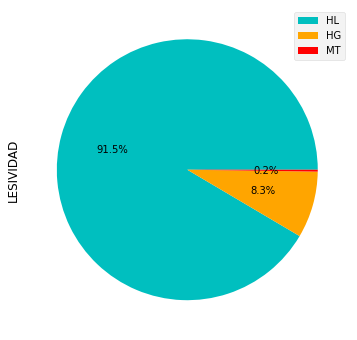

In [ ]:
# Excluimos registros con lesividad ilesa o no asignada
tmp_filter = ~(accidentes['LESIVIDAD'].str.contains('NO ASIGNADA|IL'))

# Contamos nº de registros según lesividad
accidentes[tmp_filter]['LESIVIDAD'].value_counts()\
  .plot.pie(autopct='%1.1f%%', labels=None,
            legend=True, colors=['c','orange','red'],
            figsize=(10,6))
  
plt.show()

Como podemos ver en la gráfica, del 51% total de las víctimas, la gran mayoría (91,5%) fueron heridos leves mientras que el 8,3% terminaron gravemente heridas y un 0,2% fallecieron.



In [ ]:
# Seleccionamos un único parte por accidente
tmp_filter = ~accidentes['Nº PARTE'].duplicated()

# Calculamos total de víctimas
total_victimas = accidentes[tmp_filter]['Nº VICTIMAS'].sum()

# Agrupamos registros por tipo de accidente y calculamos su nº de víctimas
(accidentes[tmp_filter].groupby('TIPO ACCIDENTE')['Nº VICTIMAS']\
   .sum().sort_values(ascending=False)/total_victimas)*100

TIPO ACCIDENTE
COLISIÓN DOBLE             57.910969
ATROPELLO                  15.715624
CAÍDA MOTOCICLETA           7.967285
COLISIÓN MÚLTIPLE           7.883075
CHOQUE CON OBJETO FIJO      5.089420
CAÍDA CICLOMOTOR            1.723140
CAÍDA BICICLETA             1.721035
CAÍDA VIAJERO BUS           1.202093
VUELCO                      0.396838
OTRAS CAUSAS                0.382101
CAÍDA VEHÍCULO 3 RUEDAS     0.008421
Name: Nº VICTIMAS, dtype: float64

Analizando el número de víctimas ocasionadas por cada tipo de accidente de tráfico observamos que más de la mitad de las víctimas, aproximadamente un 57% del total, estuvieron involucradas en accidentes en los que se produjeron una **colisión doble entre vehículos**. 

El segundo tipo de accidente más común, bastante alejado del primero (aproximadamente un 15% de los casos) fue el **atropello a peatones**.

A este tipo de accidente le siguen otros menos comunes como la **caída de motocicleta** o la **colisión múltiple** que es aquella en la que participan más de dos vehículos.

Vamos a comprobar la lesividad de las víctimas para cada tipo de accidente:

In [ ]:
# Filtramos por lesividad de la víctima: leve, grave o muerto
tmp_filter = accidentes['LESIVIDAD'].str.contains('HL|HG|MT')

# Calculamos nº de víctimas por tipo de accidente y lesividad
accidentes[tmp_filter].groupby(['TIPO ACCIDENTE','LESIVIDAD'])\
  .size().unstack().fillna(0).astype(int).sort_values('MT', ascending=False)

LESIVIDAD,HG,HL,MT
TIPO ACCIDENTE,,,
ATROPELLO,2871,11930,129
COLISIÓN DOBLE,3318,51651,47
CHOQUE CON OBJETO FIJO,475,4341,19
CAÍDA MOTOCICLETA,552,7001,16
COLISIÓN MÚLTIPLE,282,7197,10
CAÍDA CICLOMOTOR,95,1541,1
CAÍDA VIAJERO BUS,48,1093,1
CAÍDA BICICLETA,144,1491,0
CAÍDA VEHÍCULO 3 RUEDAS,0,8,0


La **colisión doble** es el accidente que más heridos leves y graves ocasiona mientras que los **atropellos a peatones** son la principal causa de muerte en Madrid.

Ambos tipos de accidentes son los que provocan el mayor número de víctimas, por esta razón, centraremos nuestra atención en analizar cada uno más a fondo:

In [ ]:
# Creamos dataframe específico para cada tipo de accidente
colisiones = accidentes[accidentes['TIPO ACCIDENTE']=='COLISIÓN DOBLE'].copy()
atropellos = accidentes[accidentes['TIPO ACCIDENTE']=='ATROPELLO'].copy()

## Atropellos a peatones

Se considera atropello al **accidente ocurrido entre un vehículo y un peatón** que ocupa la calzada o que transita por aceras, refugios,
paseos o zonas de la vía pública no destinada a la circulación de vehículos.

A lo largo de esta sección, responderemos a las siguientes preguntas:

* ¿Cuál es la evolución de las víctimas por atropello a lo largo del tiempo?
* ¿Cuál es la edad de los peatones heridos o muertos?
* ¿Qué vehículos han ocasionado más víctimas por atropello?
* ¿En qué barrios y/o calles se producen más atropellos? ¿a qué hora?
* ¿En qué barrio, día de la semana u hora es superior la tasa de peatones graves y muertos?

En primer lugar, vamos a analizar la lesividad de los peatones atropellados durante el período 2010-2018:


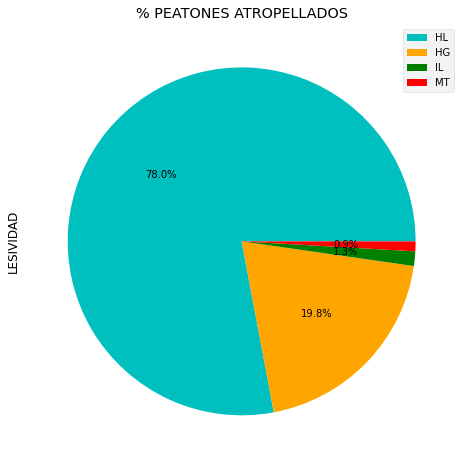

In [ ]:
# Creamos dataframe específico con los registros de peatones
peatones = atropellos[atropellos['TIPO PERSONA']=='PEATON'].copy()

# Calculamos lesividad peatones y graficamos salida
peatones['LESIVIDAD'].value_counts()\
  .plot.pie(title='% PEATONES ATROPELLADOS', autopct='%1.1f%%', labels=None,
            legend=True, colors=['c','orange','green','red'],
            figsize=(12,8))
  
plt.show()

La gran parte de accidentes consistentes en atropello a peatones han ocasionado heridos leves, ascendiendo a aproximadamente un 80% del total, mientras que los heridos graves ocupan cerca del 20%.

Por otro lado, podemos ver que la mortandad los atropellos es baja, tan sólo el 0,9% (129 fallecidos) de los atropellos terminan provocando víctimas mortales.

Si analizamos la evolución de las víctomas por atropello a lo largo del tiempo:

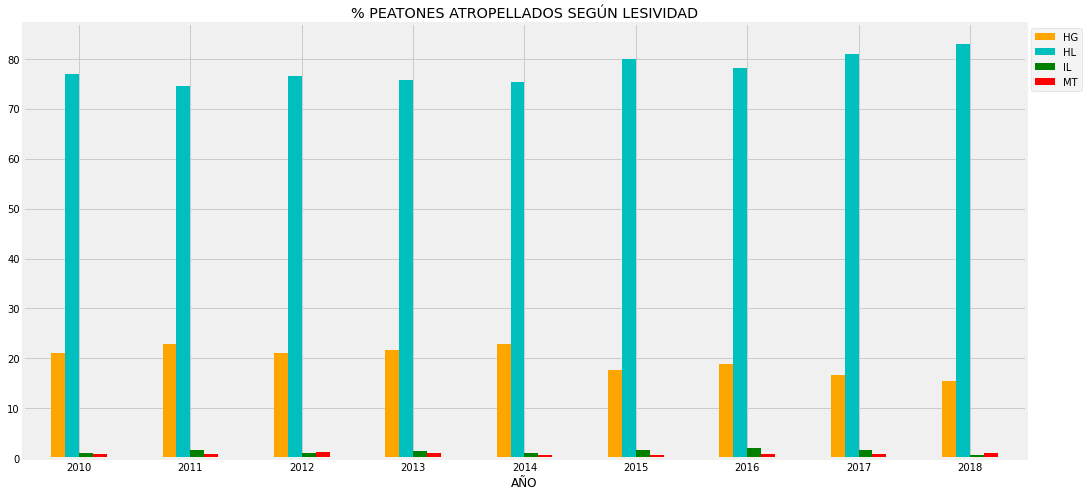

In [ ]:
# Calculamos % peatones atropellados según tipo de lesividad 
(peatones.groupby('AÑO')['LESIVIDAD'].value_counts(normalize=True)*100).unstack().fillna(0)\
  .plot.bar(title='% PEATONES ATROPELLADOS SEGÚN LESIVIDAD', figsize=(16,8), rot=0,
            color=['orange','c','green','red'])
  
# Desplazamos legenda fuera del gráfico
plt.legend(bbox_to_anchor=(1,1))

plt.show()

Observamos una disminución mantenida de los heridos graves a partir del año 2014 en adelante, así como un aumento de los heridos leves llegando a su máximo en el año 2018.

**¿Cuál es la edad de los peatones heridos o muertos?**

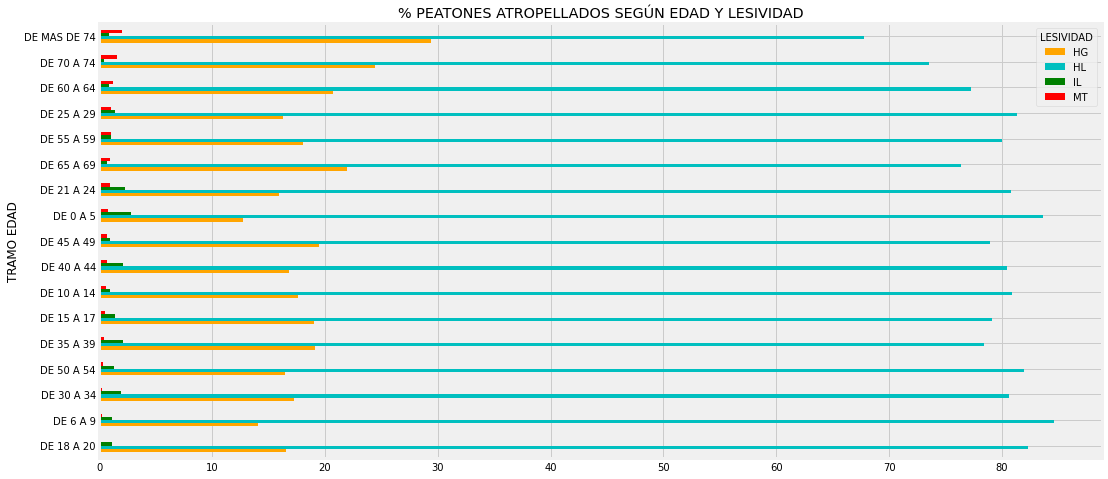

In [ ]:
# Excluimos peatones con edad desconocida
tmp_filter = ~(peatones['TRAMO EDAD']=='DESCONOCIDA')

# Calculamos % peatones atropellados según edad y lesividad
(peatones[tmp_filter].groupby('TRAMO EDAD')['LESIVIDAD'].value_counts(normalize=True)*100)\
  .unstack().fillna(0).sort_values('MT').\
  plot.barh(title='% PEATONES ATROPELLADOS SEGÚN EDAD Y LESIVIDAD', figsize=(16,8),
            color=['orange','c','green','red'])

plt.show()

En cuanto a la relación entre la edad y la lesividad de los sujetos, encontramos la mayor mortalidad y número de heridos graves en individuos de más de 60 años. Este grupo de edad es más propenso a tener problemas de visión o de movilidad, esto podría tener una relación directa con este hecho...

Sin embargo, también es interesante prestar atención a que los datos que reflejan mayor gravedad no siempre van acompañados del aumento de la edad, ya que podemos observar cómo la mortalidad entre los 21 y los 29 años es incluso mayor que la de edades superiores como la treintena.

Aquí también podrían valorarse otros factores relacionados con la conducción más allá de la edad de los ocupantes como velocidad, consumo de sustancias…

Vamos a revisar la hora a la que ocurrieron más atropellos mortales para cada grupo de edad:

In [ ]:
peatones[peatones['LESIVIDAD'].str.contains('MT')].groupby(['TRAMO EDAD','RANGO HORARIO']).size()\
  .unstack().fillna(0).idxmax(axis=1)

TRAMO EDAD
DE 0 A 5        DE 13:00 A 13:59
DE 10 A 14      DE 14:00 A 14:59
DE 15 A 17      DE 21:00 A 21:59
DE 21 A 24        DE 2:00 A 2:59
DE 25 A 29        DE 6:00 A 6:59
DE 30 A 34        DE 6:00 A 6:59
DE 35 A 39      DE 10:00 A 10:59
DE 40 A 44        DE 3:00 A 3:59
DE 45 A 49      DE 23:00 A 23:59
DE 50 A 54      DE 20:00 A 20:59
DE 55 A 59      DE 00:00 A 00:59
DE 6 A 9        DE 14:00 A 14:59
DE 60 A 64      DE 00:00 A 00:59
DE 65 A 69      DE 15:00 A 15:59
DE 70 A 74      DE 19:00 A 19:59
DE MAS DE 74    DE 10:00 A 10:59
dtype: object

Con estos datos podemos confirmar la hipótesis que habíamos realizado anteriormente en la que afirmábamos que la mayoría de los atropellos ocurridos fueran durante la noche. 

En estos atropellos pueden influir factores como la falta de visibilidad, que las víctimas estuvieran bajos los efectos del alcohol o de otras sustancias, las distracciones de los conductores por cansancio o fatiga, el ocio nocturno, etc...

Por otro lado, observamos que los grupos de menor edad (0 a 5 años, 6 a 9 años, 10 a 14 años), vemos una tendencia clara de que los horarios (13:00 a 13:59h, 14:00 a 14:59h, 14:00 a 14:59h, respectivamente) podrían corresponder a las horas de salida de los menores de los centros educativos.

**¿Qué vehículos han ocasionado más víctimas por atropello?**

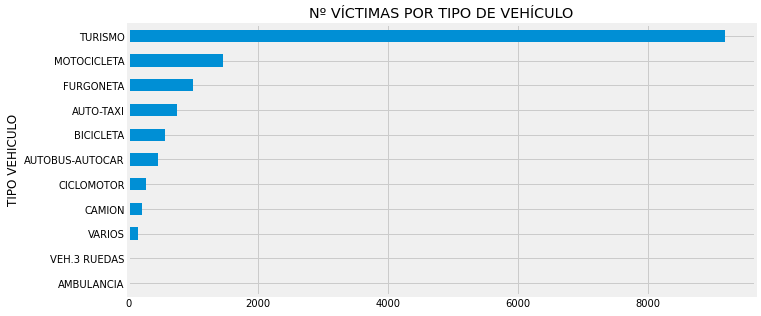

In [ ]:
# Excluimos registros de peatones y acompañantes
tmp_filter1 = ~atropellos['TIPO PERSONA'].str.contains('PEATON|VIAJERO')

# Creamos dataframe temporal aplicando el primer filtro
tmp_df = atropellos[tmp_filter1]

# Excluimos nº de partes duplicados
tmp_filter2 = ~tmp_df['Nº PARTE'].duplicated()

# Aplicamos segundo filtro, agrupamos por tipo de vehículo y calculamos nº de víctimas
tmp_df[tmp_filter2].groupby('TIPO VEHICULO')['Nº VICTIMAS'].sum()\
  .sort_values().plot.barh(figsize=(10,5), title='Nº VÍCTIMAS POR TIPO DE VEHÍCULO')

plt.show()

El tipo de vehículo que ha ocasionado más víctimas han sido los **turismos**, superando los 8000 casos y siendo más de cuatro veces superior al segundo tipo de vehículo: las motocicletas.

**¿En qué barrios y/o calles se producen más atropellos? ¿a qué hora?**

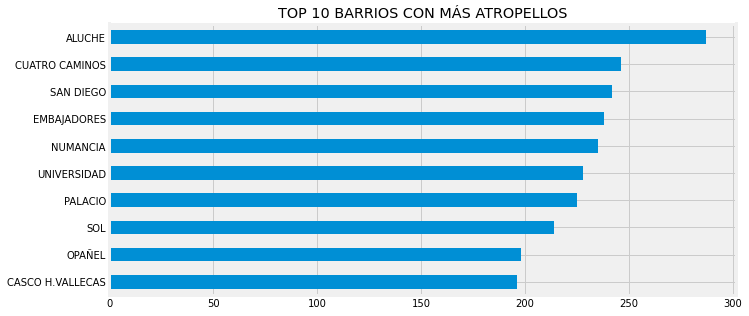

In [ ]:
# Seleccionamos un único Nº parte por atropello
tmp_filter = ~atropellos['Nº PARTE'].duplicated()

# Seleccionamos los 10 barrios con más atropellos
top10_barrios = atropellos[tmp_filter]['BARRIO'].value_counts()\
  .sort_values(ascending=False).head(10)

top10_barrios.sort_values().plot.barh(title='TOP 10 BARRIOS CON MÁS ATROPELLOS',
                                      figsize=(10,5))

plt.show()

En la gráfica se recogen los 10 barrios con mayor número de atropellos destacando el barrio de **Aluche** en primer lugar, aunque en el resto de barrios, las diferencias no son tan notorias.

Para cada uno de estos barrios, vamos a obtener la "hora punta" a la que se han producido mayor número de atropellos:

In [ ]:
# Creamos dataframe temporal excluyendo nº de partes duplicados
tmp_df = atropellos[~atropellos['Nº PARTE'].duplicated()]

# Filtramos para incluir los 10 barrios con más atropellos
mask = tmp_df['BARRIO'].isin(top10_barrios.index)

# Agrupamos por barrio y hora y calculamos la hora con más atropellos por barrio
tmp_df[mask].groupby(['BARRIO','RANGO HORARIO']).size().unstack().idxmax(axis=1)

BARRIO
ALUCHE              DE 12:00 A 12:59
CASCO H.VALLECAS      DE 8:00 A 8:59
CUATRO CAMINOS      DE 14:00 A 14:59
EMBAJADORES         DE 13:00 A 13:59
NUMANCIA            DE 14:00 A 14:59
OPAÑEL              DE 14:00 A 14:59
PALACIO             DE 11:00 A 11:59
SAN DIEGO           DE 13:00 A 13:59
SOL                 DE 20:00 A 20:59
UNIVERSIDAD         DE 13:00 A 13:59
dtype: object

Observamos que las horas que confluyen mayor número de atropellos se encuentran en horario diurno principalmente en las horas centrales del día.

Por otro lado, si en lugar de los barrios, nos centramos en las calles con mayor número de atropellos a peatones, tenemos a Mercamadrid en primer lugar, con diferencia, seguido del Aeropuerto de Barajas:

In [ ]:
# Excluimos nº de partes duplicados
tmp_filter = ~atropellos['Nº PARTE'].duplicated()

# Direcciones con mayor número de atropellos
atropellos[tmp_filter]['DIRECCION'].value_counts().head(10)

MERCADO  MERCAMADRID                                               37
COMPLEJO  AEROPUERTO DE BARAJAS                                    22
PASEO DE LA CASTELLANA & PLAZA DE LIMA                             18
CALLE DE LA FUENTE CARRANTONA & CALLE DE LA HACIENDA DE PAVONES    11
PASEO DEL PRADO & PLAZA DE CIBELES                                 11
ESTACION DE CHAMARTIN                                              10
PARQUE DEL RETIRO                                                  10
COMPLEJO DEL DOCE DE OCTUBRE                                       10
AVENIDA DE LA REINA VICTORIA & CALLE DEL MARQUES DE LEMA            9
GLORIETA DEL VALLE DE ORO 13                                        9
Name: DIRECCION, dtype: int64

**¿En qué barrio, día de la semana u hora es superior la tasa de peatones graves y muertos?**

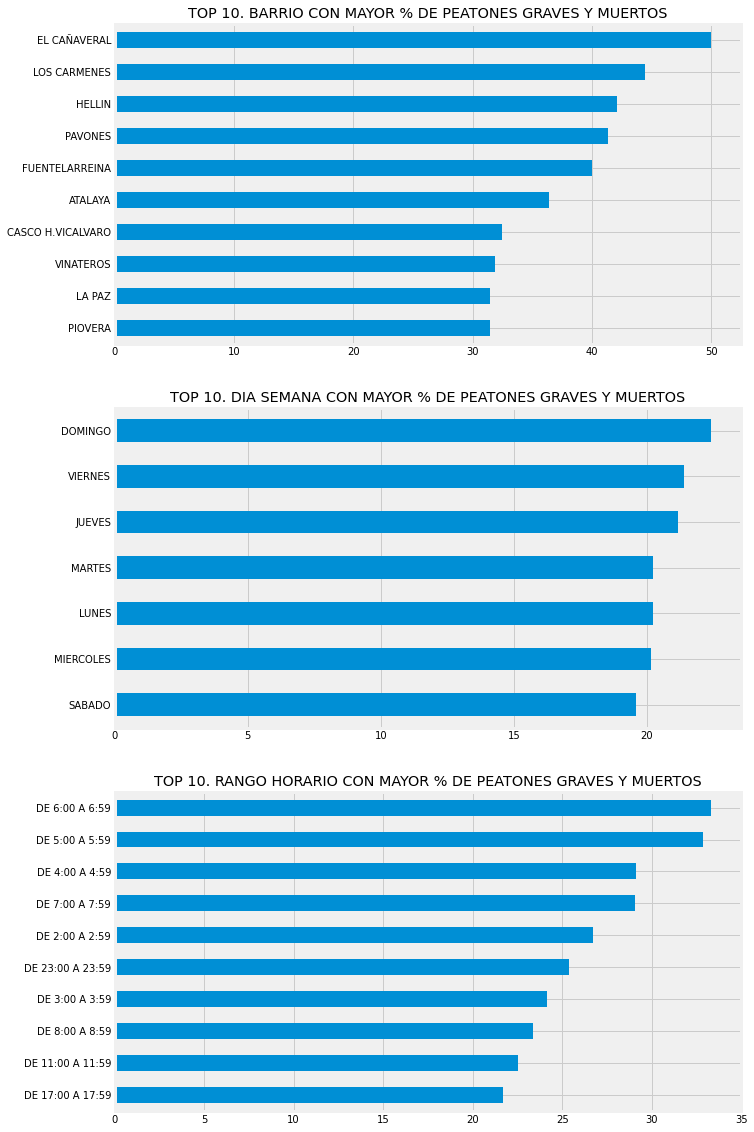

In [ ]:
campo = ['BARRIO', 'DIA SEMANA', 'RANGO HORARIO']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

for c in campo:
  pos = campo.index(c)
  
  # Calculamos nº de peatones atropellados para cada campo
  total_peatones = peatones[c].value_counts()

  # Calculamos nº de peatones heridos graves y muertos para cada campo
  peatones_HG_MT = peatones[peatones['LESIVIDAD'].str.contains('HG|MT')][c].value_counts()

  ratio_peatones = ((peatones_HG_MT / total_peatones)*100).fillna(0).sort_values(ascending=False)

  ratio_peatones.head(10).sort_values().plot.barh(ax=ax[pos],
      title='TOP 10. {} CON MAYOR % DE PEATONES GRAVES Y MUERTOS'.format(c))

plt.show()

Con esta clasificación encontramos que el barrio con mayor % de peatones graves y fallecidos es “El Cañaveral”, seguido de “Los Cármenes”.

Por otro lado, los días que se encuentran alrededor del fin de semana, jueves, viernes y domingo son los que mayor porcentaje de peatones graves y muertos tienen aunque resulta llamativo que el sábado sea el día que ocupa el último puesto en este ranking.

En cuanto al rango horario vemos que durante las 6.00 - 6.59 es el tramo en el que se producen más heridos graves y muertos. 

Esto puede deberse a que es una hora en la que muchas personas vuelven a sus casas después de una noche de ocio y estén más despreocupadas, además es una hora en la que no se suele encontrar a muchos peatones por la calle por lo que un conductor puede prestar menos atención.


## Colisiones dobles

Se considera **colisión doble** al accidente ocurrido entre 2 vehículos en movimiento. Recordamos que éste es el principal accidente de tráfico en Madrid y el que más víctimas provoca.

A continuación, vamos a responder a preguntas como:

* ¿Qué día de la semana encontramos una mayor tasa de víctimas? ¿A qué hora hubo más colisiones?
* ¿Qué % de conductores graves y muertos hubo por tipo de vehículo?
* ¿En qué barrios se producen más colisiones? ¿Cuál es el que tiene la mayor tasa de heridos graves y muertos?


En primer lugar, vamos a analizar la evolución de las colisiones en Madrid durante el período 2010-2018:

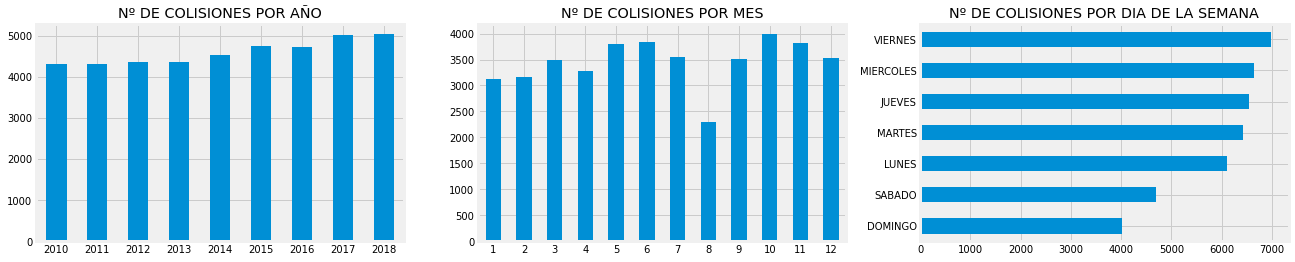

In [ ]:
# Excluimos nº de partes duplicados
unico_parte = (~colisiones['Nº PARTE'].duplicated())

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

colisiones[unico_parte].groupby('AÑO').size()\
  .plot.bar(title='Nº DE COLISIONES POR AÑO', ax=ax[0], rot=0)

colisiones[unico_parte].groupby('MES').size()\
  .plot.bar(title='Nº DE COLISIONES POR MES', ax=ax[1], rot=0)

colisiones[unico_parte].groupby('DIA SEMANA').size().sort_values()\
  .plot.barh(title='Nº DE COLISIONES POR DIA DE LA SEMANA', ax=ax[2], rot=0)

for ax in ax.flat:
    ax.set(xlabel='', ylabel='')

plt.show()

Si examinamos las anteriores gráficas comprobamos que:

1. En los 4 primeros años (2010-2013), el nº de colisiones se mantiene en unas cifras similares entorno a los 4400, sin embargo, a partir de 2014, se produce un incremento gradual (excepto en 2016) que repercutirá en el nº de víctimas.
2. Cada año, en Agosto, disminuye el tráfico en la ciudad al ser el principal mes de vacaciones en España, en consecuencia, descienden el número de colisiones.
2. El viernes es el día de la semana en el que más colisiones han ocurrido (ocio, salir antes del trabajo...)

A raíz de los resultados de las gráficas, nos surgen algunas preguntas:
1. El incremento anual de las colisiones a partir de 2014 implica un aumento del nº total de víctimas pero, ¿en qué % aumentaron los heridos graves y fallecidos?
2. ¿En qué día de la semana encontramos una mayor tasa de víctimas?
3. Para cada día de la semana, ¿a qué hora hubo más colisiones?

Comenzamos analizando la primera pregunta:

HL 93.87215357082798 %
HG 6.042423050772572 %
MT 0.08542337839944913 %


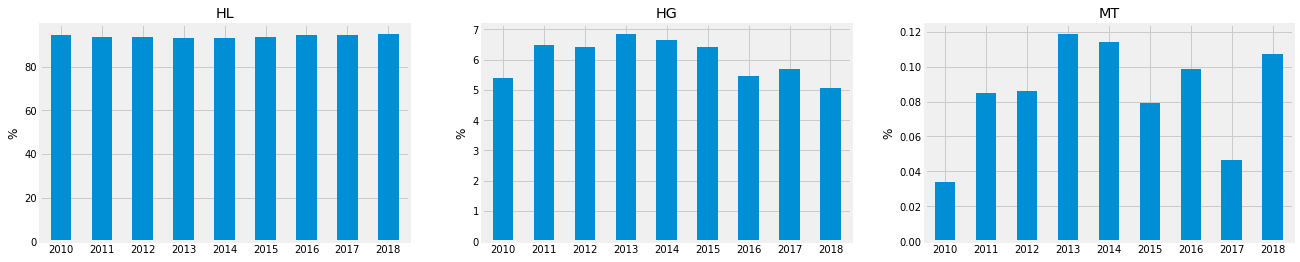

In [ ]:
# Excluimos nº de partes duplicados
unico_parte = (~colisiones['Nº PARTE'].duplicated())

# Calculamos nº total de víctimas por año
total_vict_año = colisiones[unico_parte].groupby('AÑO')['Nº VICTIMAS'].sum()

lesividad_vic = ['HL', 'HG', 'MT']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

for vic in lesividad_vic:
  pos = lesividad_vic.index(vic)
  lesividad_filtro = (colisiones['LESIVIDAD']==vic)
  df = (colisiones[lesividad_filtro].groupby('AÑO').size()/total_vict_año)*100

  print(vic, df.mean(),'%')

  df.plot.bar(ax=ax[pos], rot=0, title=vic)
  #ax[pos].axhline(df.mean(), c='black')

for ax in ax.flat:
    ax.set(xlabel='', ylabel='%')

plt.show()

Observamos que **los heridos leves (HL) suponen casi el 94% de las víctimas de colisiones de tráfico de cada año**.

Desde 2010 a 2013, el % de heridos leves fue disminuyendo cada año mientras que los heridos graves (HG) y muertos (MT) aumentaron.

A partir de 2014, hemos visto que el nº colisiones fue aumentando cada año y, por lo tanto, el nº de víctimas. 

Sin embargo, es buena señal ver que el % de heridos graves ha ido descendiendo a partir de ese año, a excepción del 2017 donde aumentó ligeramente.

Por contra, el % de fallecidos no parece seguir esta tendencia, aunque con la reducida tasa existente puede deberse a circunstancias propias del accidente.

Continuamos con la siguiente pregunta:

**¿Qué día de la semana encontramos una mayor tasa de víctimas?**

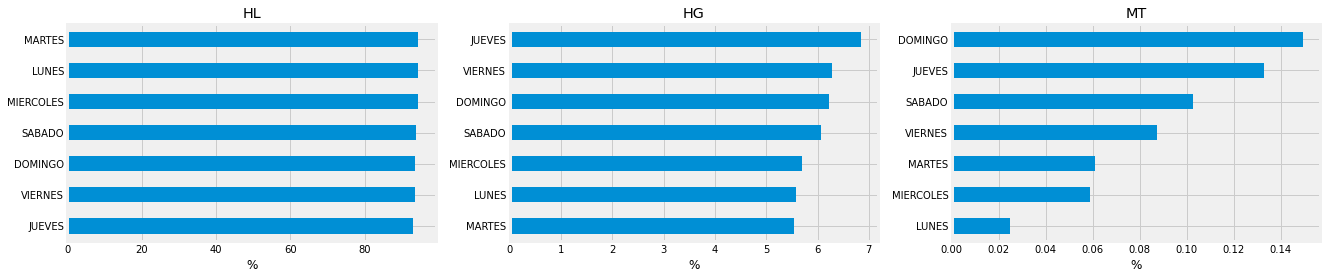

In [ ]:
# Excluimos nº de partes duplicados
unico_parte = (~colisiones['Nº PARTE'].duplicated())

# Calculamos nº total de víctimas por día de la semana
total_vict_sem = colisiones[unico_parte].groupby('DIA SEMANA')['Nº VICTIMAS'].sum()

lesividad_vic = ['HL', 'HG', 'MT']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

for vic in lesividad_vic:
  pos = lesividad_vic.index(vic)
  lesividad_filtro = (colisiones['LESIVIDAD']==vic)
  df = (colisiones[lesividad_filtro].groupby('DIA SEMANA').size()/total_vict_sem)*100

  df.sort_values().plot.barh(ax=ax[pos], title=vic)
  ax[pos].set(xlabel='%', ylabel='')

plt.show()

En cuanto a los **heridos leves** podemos ver como prácticamente es indiferente el día de la semana ya que el % de víctimas es casi el mismo para cada día.

No ocurre lo mismo para los **heridos graves** y en especial para los **muertos**:

En el caso de los **heridos graves** podemos ver como el día en el que encontramos el mayor porcentaje de este tipo de víctimas es el **jueves**.

Por otro lado, el domingo es el día de la semana en el que encontramos el mayor porcentaje de **muertos**.

**Para cada día de la semana, ¿a qué hora hubo más colisiones?**

In [ ]:
colisiones[unico_parte].groupby(['RANGO HORARIO', 'DIA SEMANA']).size().unstack().idxmax()\
  .sort_values(ascending=False).reset_index().rename(columns={0:'HORA PUNTA'})

,DIA SEMANA,HORA PUNTA
0,VIERNES,DE 14:00 A 14:59
1,MIERCOLES,DE 14:00 A 14:59
2,MARTES,DE 14:00 A 14:59
3,LUNES,DE 14:00 A 14:59
4,JUEVES,DE 14:00 A 14:59
5,DOMINGO,DE 14:00 A 14:59
6,SABADO,DE 13:00 A 13:59


Para todos los días de la semana, excepto el sábado, la hora en la que se producen más colisiones ocurre entre las 14-15h.

Probablemente, se deba a un aumento del volumen de tráfico en la carretera ya que coincide con la hora de salida del trabajo y pueden entrar en juego factores como el estrés, la ansiedad o las ganas de llegar a casa.

**¿A qué hora fue superior la tasa de heridos graves y muertos por colisiones dobles?**

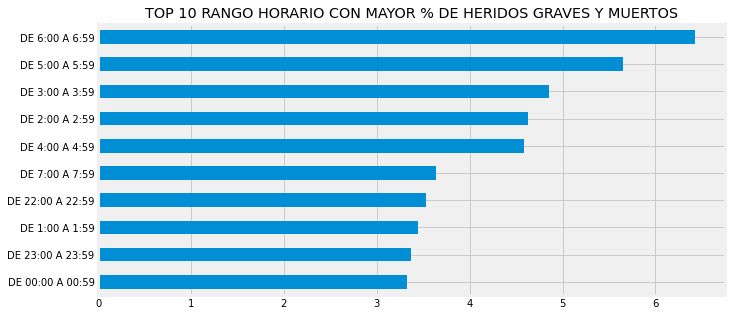

In [ ]:
# Calculamos nº de peatones atropellados por rango horario
total_colisiones = colisiones['RANGO HORARIO'].value_counts()

# Calculamos nº de peatones heridos graves y muertos por rango horario
colisiones_HG_MT = colisiones[colisiones['LESIVIDAD'].str.contains('HG|MT')]['RANGO HORARIO'].value_counts()

ratio_colisiones = ((colisiones_HG_MT / total_colisiones)*100).fillna(0).sort_values(ascending=False)

ratio_colisiones.head(10).sort_values().plot.barh(figsize=(10,5),
      title='TOP 10 RANGO HORARIO CON MAYOR % DE HERIDOS GRAVES Y MUERTOS')

plt.show()

Aunque en las horas del mediodía es cuando se producen más colisiones, durante la noche es cuando se producen más heridos graves y muertos donde afecta la visibilidad y otros posibles factores (exceso velocidad, ocio, drogas...)

**¿Qué % de conductores graves y muertos hubo por tipo de vehículo?**

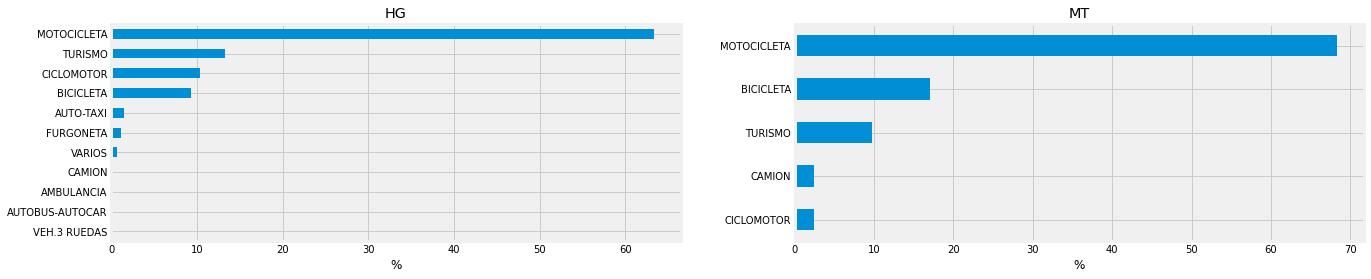

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,4))

lesividad_vic = ['HG', 'MT']

for vic in lesividad_vic:

  pos = lesividad_vic.index(vic)

  # Excluimos registros de viajeros y peatones y filtramos por tipo de lesividad
  tmp_filter = (~colisiones['TIPO PERSONA'].str.contains('VIAJERO|PEATON')) \
  & (colisiones['LESIVIDAD']==vic)

  df = (colisiones[tmp_filter]['TIPO VEHICULO'].value_counts(normalize=True))*100

  df.sort_values().plot.barh(ax=ax[pos], title=vic)
  ax[pos].set(xlabel='%', ylabel='')

plt.show()

Observamos que los motoristas son los principales conductores afectados en las colisiones de tráfico, representando más del 60% de las víctimas graves y muertas. 

Es un dato bastante esperable ya que la protección que ofrece una motocicleta es bastante inferior a la que ofrecen el resto de vehículos.

Nos preguntamos, si la hora, las condiciones ambientales y/o el estado de la vía afectan a la lesividad de este grupo:

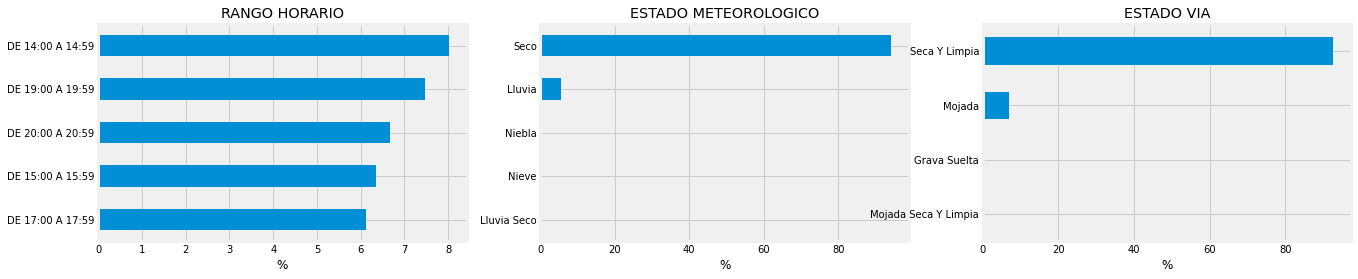

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

factores = ['RANGO HORARIO', 'ESTADO METEOROLOGICO', 'ESTADO VIA']

for f in factores:
  pos = factores.index(f)

  # Excluimos registros de viajeros y peatones
  tmp_filter = (colisiones['TIPO PERSONA']=='MOTORISTA')\
    & (colisiones['LESIVIDAD'].str.contains('HG|MT'))

  df = ((colisiones[tmp_filter][f].value_counts(normalize=True))*100)

  df.head().sort_values().plot.barh(ax=ax[pos], title=f)
  ax[pos].set(xlabel='%', ylabel='')

plt.show()

Contra todo pronóstico nos encontramos que la hora en la que se producen los accidentes en los que están involucrados las motocicletas es a plena luz del día, por lo que, a priori podemos descartar que la falta de luminosidad sea un factor que haya influido en estos accidentes. 

También es sorprendente que predomina un estado meteorológico “seco”, y por tanto, también un estado de la vía “seca y limpia”.

**¿En qué barrios se producen más colisiones? ¿Cuál es el que tiene la mayor tasa de heridos graves y muertos?**

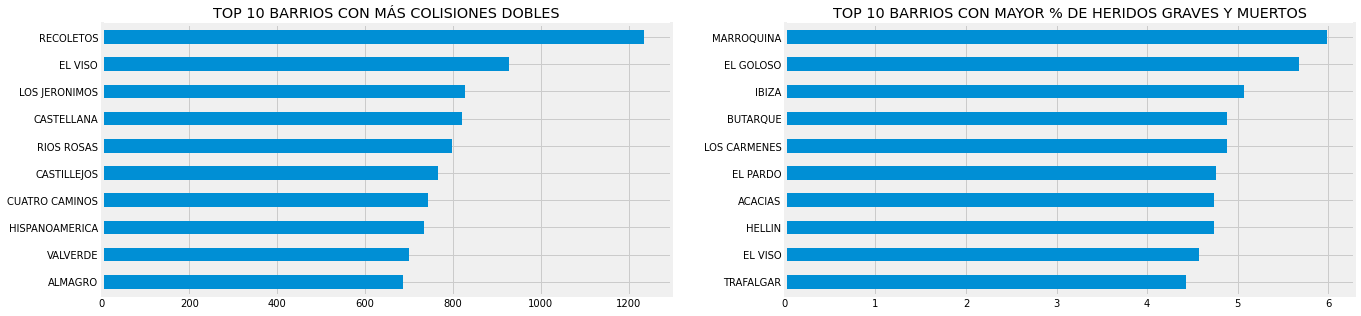

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# Seleccionamos un único Nº parte por atropello
tmp_filter = ~colisiones['Nº PARTE'].duplicated()

# Seleccionamos los 10 barrios con más atropellos
top10_barrios = colisiones[tmp_filter]['BARRIO'].value_counts()\
  .sort_values(ascending=False).head(10)

top10_barrios.sort_values().plot.barh(title='TOP 10 BARRIOS CON MÁS COLISIONES DOBLES', ax=ax[0])

# Calculamos nº de peatones atropellados por barrio, día semana o rango horario
total_colisiones = colisiones['BARRIO'].value_counts()

# Calculamos nº de peatones heridos graves y muertos por barrio, día semana o rango horario
colisiones_HG_MT = colisiones[colisiones['LESIVIDAD'].str.contains('HG|MT')]['BARRIO'].value_counts()

ratio_colisiones = ((colisiones_HG_MT / total_colisiones)*100).fillna(0).sort_values(ascending=False)

ratio_colisiones.head(10).sort_values().plot.barh(ax=ax[1],
      title='TOP 10 BARRIOS CON MAYOR % DE HERIDOS GRAVES Y MUERTOS')

plt.show()

**Recoletos** es el barrio que concentra el mayor número de colisiones dobles, superando los 1200 casos. Muy por debajo de este valor , encontramos el resto de barrios que comparten números de colosiones más similares.

Por otro lado, la **Marroquina** y **El Goloso** destacan por ser los 2 barrios con mayor tasa de heridos graves y muertos, con un porcentaje cercano al 6%.

### Colisiones con ciclistas

Dentro de las colisiones dobles vamos a analizar aquellas que ocurren entre vehículos y ciclistas, excluyendo aquellas ocurridas únicamente entre ciclistas: 

1. ¿En qué barrios se han producido más accidentes? ¿Cuál es el que tiene la mayor tasa de heridos graves y muertos?
2. Edad y lesividad de los ciclistas
3. ¿Qué vehículos han ocasionado más accidentes con ciclistas?
5. ¿Afecta el estado de la vía y las condiciones ambientales a la lesividad de los ciclistas?

In [ ]:
# Creamos dataframe temporal con registros de ciclistas
tmp_df = colisiones[colisiones['TIPO PERSONA']=='CICLISTA']

# Creamos serie con nº partes duplicados que implican colisiones entre ciclistas
excluir_partes = tmp_df[tmp_df['Nº PARTE'].duplicated()]['Nº PARTE']

# Excluimos colisiones entre ciclistas a través de la serie num_parte
# Creamos serie con nº de partes de colisiones entre ciclistas y vehículos
incluir_partes = tmp_df[~tmp_df['Nº PARTE'].isin(excluir_partes)]['Nº PARTE']

# Creamos dataframe con registros de colisiones entre ciclistas y vehículos 
col_ciclistas = colisiones[colisiones['Nº PARTE'].isin(incluir_partes)]

In [ ]:
print('Total de registros:', len(col_ciclistas))

print('Total de colisiones con ciclistas involucrados:', 
      len(col_ciclistas['Nº PARTE'].unique()))

print('Total de víctimas:',
      col_ciclistas.loc[~col_ciclistas['Nº PARTE'].duplicated(), 'Nº VICTIMAS'].sum())

Total de registros: 5150
Total de colisiones con ciclistas involucrados: 2331
Total de víctimas: 2474


Durante el período 2010-2018, hubo en Madrid 2331 colisiones con ciclistas, con un total de 5150 personas involucradas y 2474 víctimas (heridos leves, graves y muertos).

In [ ]:
# % víctimas por tipo de vehículo
col_ciclistas[col_ciclistas['LESIVIDAD'].str.contains('HL|HG|MT')]['TIPO VEHICULO']\
  .value_counts(normalize=True)

BICICLETA          0.934115
MOTOCICLETA        0.033549
TURISMO            0.008488
VARIOS             0.008084
AUTOBUS-AUTOCAR    0.006063
CICLOMOTOR         0.006063
AUTO-TAXI          0.002425
FURGONETA          0.000808
NO ASIGNADO        0.000404
Name: TIPO VEHICULO, dtype: float64

Además, de esas 2474 víctimas, el 93% corresponden a ciclistas (y sus posibles acompañantes):

In [ ]:
# Nº de ciclistas y acompañantes
col_ciclistas[col_ciclistas['TIPO VEHICULO']=='BICICLETA']['TIPO PERSONA'].value_counts()

CICLISTA    2331
VIAJERO       26
Name: TIPO PERSONA, dtype: int64

In [ ]:
# Filtramos por ciclistas y viajeros con lesividad leve, grave o muerto
tmp_filter = (col_ciclistas['LESIVIDAD'].str.contains('HL|HG|MT')) \
  & (col_ciclistas['TIPO VEHICULO']=='BICICLETA') \
  & (col_ciclistas['TIPO PERSONA'].str.contains('VIAJERO|CICLISTA'))

# Nº ciclistas y viajeros por lesividad
col_ciclistas[tmp_filter].groupby(['TIPO PERSONA', 'LESIVIDAD']).size()

TIPO PERSONA  LESIVIDAD
CICLISTA      HG            244
              HL           2037
              MT              7
VIAJERO       HG              1
              HL             22
dtype: int64

Si analizamos la lesividad de los ciclistas por rango de edad:

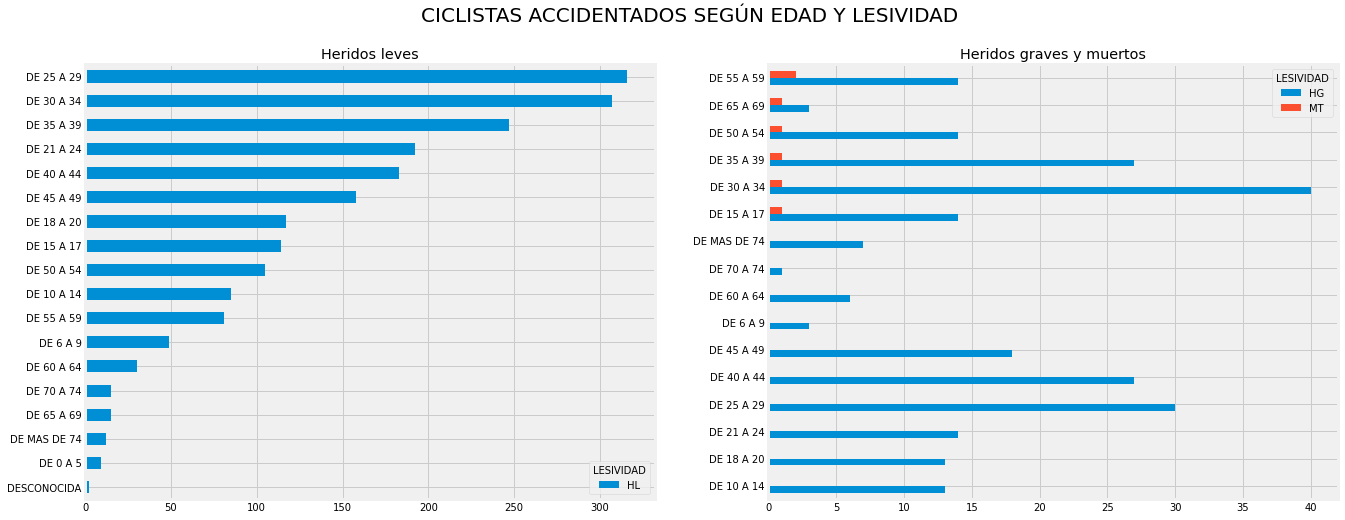

In [ ]:
# Creamos dataframe con registros de ciclistas
ciclistas = col_ciclistas[col_ciclistas['TIPO PERSONA']=='CICLISTA'].copy()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

fig.suptitle('CICLISTAS ACCIDENTADOS SEGÚN EDAD Y LESIVIDAD', fontsize=20)

# Filtramos por ciclistas leves
tmp_filter1 = ciclistas['LESIVIDAD'].str.contains('HL')

# Agrupamos ciclistas por edad y lesividad leve
ciclistas[tmp_filter1].groupby('TRAMO EDAD')['LESIVIDAD'].value_counts()\
  .unstack().fillna(0).sort_values('HL')\
  .plot.barh(ax=ax[0], title='Heridos leves')

# Filtramos por ciclistas graves
tmp_filter2 = ciclistas['LESIVIDAD'].str.contains('HG|MT')

# Agrupamos ciclistas por edad y lesividad grave o muerto
ciclistas[tmp_filter2].groupby('TRAMO EDAD')['LESIVIDAD'].value_counts()\
  .unstack().fillna(0).sort_values('MT')\
  .plot.barh(ax=ax[1], title='Heridos graves y muertos')

for ax in ax.flat:
    ax.set(xlabel='', ylabel='')

plt.show()

Superando los 300 casos, se aprecia un mayor número de heridos leves en edades jóvenes comprendidas entre los 25 y 34 años mientras que, los grupos de 55-59, 60-64 o 70-74, se encuentran en posiciones bajas de este listado con menos de 100 casos en general.

El tramo que más heridos graves recoge es el que se encuentra entre los 30 y los 34 años. Cabe destacar que este tramo es el segundo en el que más heridos leves encontramos. 

Por otro lado, el tramo de edad en el que encontramos más muertos es el que va desde los 55 a los 59 años. 

Es coherente que un tramo que recoge víctimas de mayor edad sea uno de los que más mortandad tenga debido a que este tipo de víctimas, por su edad, son más débiles ante un accidente y su capacidad de reacción es menor.

**¿Afecta el estado de la vía y las condiciones ambientales a la lesividad de los ciclistas?**

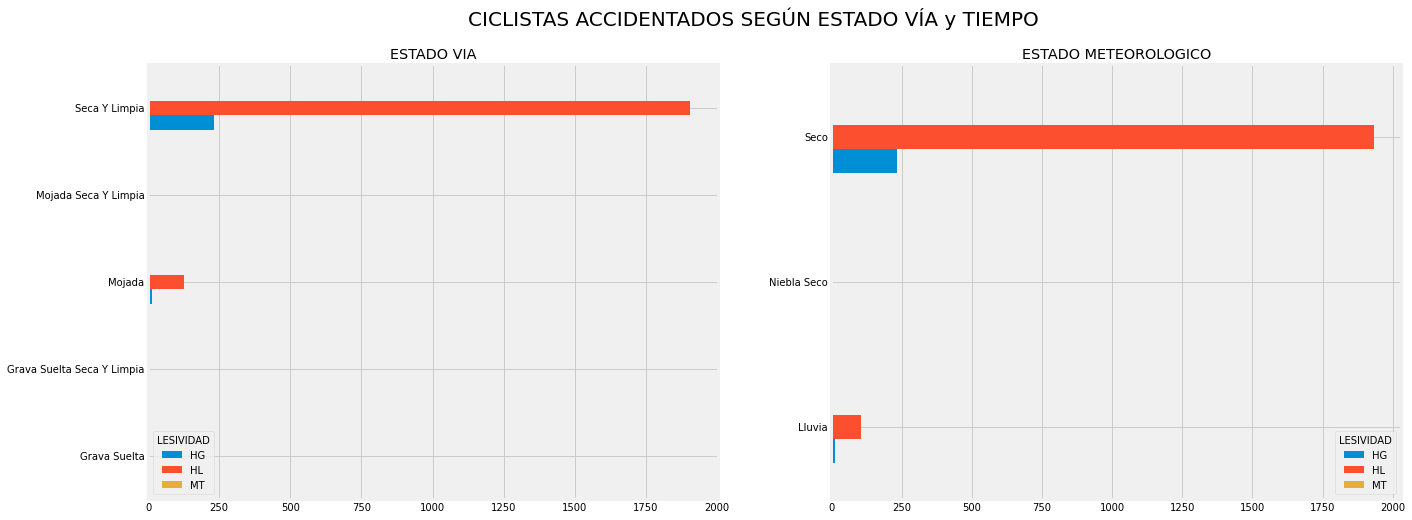

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

fig.suptitle('CICLISTAS ACCIDENTADOS SEGÚN ESTADO VÍA y TIEMPO', fontsize=20)

tmp_filter = ciclistas['LESIVIDAD'].str.contains('HL|HG|MT')

ciclistas[tmp_filter].groupby(['ESTADO VIA','LESIVIDAD']).size().unstack().fillna(0)\
  .plot.barh(ax=ax[0], title='ESTADO VIA')

ciclistas[tmp_filter].groupby(['ESTADO METEOROLOGICO','LESIVIDAD']).size().unstack().fillna(0)\
  .plot.barh(ax=ax[1], title='ESTADO METEOROLOGICO')

for ax in ax.flat:
    ax.set(xlabel='', ylabel='')

plt.show()

Al igual que ocurría con las motocicletas, tanto la estado de la vía como el estado meteorológico no han sido dos factores que hayan influido notablemente en este tipo de accidentes, ya que podemos ver que la mayoría de los accidentes se han dado en vías en buen estado (secas y limpias) y con condiciones meteorológicas a priori favorables (seco).

**¿Qué vehículos han ocasionado más accidentes con ciclistas?**

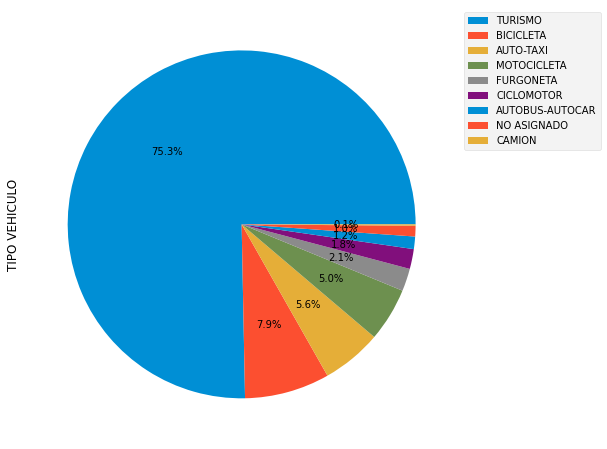

In [ ]:
tmp_filter = ~(col_ciclistas['TIPO PERSONA'].str.contains('VIAJERO|CICLISTA|PEATON'))

col_ciclistas[tmp_filter]['TIPO VEHICULO'].value_counts()\
  .plot.pie(figsize=(16,8), autopct='%1.1f%%', labels=None)

labels = col_ciclistas['TIPO VEHICULO'].unique()
plt.legend(labels=labels,  bbox_to_anchor=(1,1))
plt.show()

Con gran diferencia, el turismo ha sido el tipo de vehículo que más accidentes ha ocasionada con ciclistas, situándose en el 75% de los casos. A este tipo de vehículo le siguen el auto-taxi y las motocicletas con unos porcentajes muy inferiores.

**¿En qué barrios se han producido más accidentes con ciclistas?**

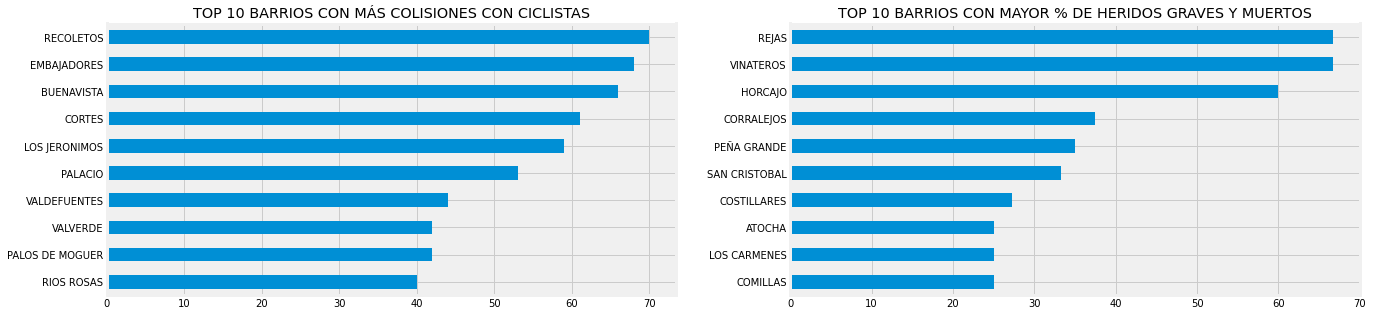

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# Seleccionamos los 10 barrios con más atropellos
top10_barrios = ciclistas['BARRIO'].value_counts()\
  .sort_values(ascending=False).head(10)

top10_barrios.sort_values().plot.barh(title='TOP 10 BARRIOS CON MÁS COLISIONES CON CICLISTAS',
                                      ax=ax[0])

# Calculamos nº de peatones atropellados por barrio, día semana o rango horario
total_colisiones = ciclistas['BARRIO'].value_counts()

# Calculamos nº de peatones heridos graves y muertos por barrio, día semana o rango horario
ciclistas_HG_MT = ciclistas[ciclistas['LESIVIDAD'].str.contains('HG|MT')]['BARRIO'].value_counts()

ratio_colisiones = ((ciclistas_HG_MT / total_colisiones)*100).fillna(0).sort_values(ascending=False)

ratio_colisiones.head(10).sort_values().plot.barh(ax=ax[1],
      title='TOP 10 BARRIOS CON MAYOR % DE HERIDOS GRAVES Y MUERTOS')

plt.show()

**Recoletos**, en el distrito Salamanca, es el barrio que más colisiones con ciclistas ha tenido. A éste le sigue el barrio **Embajadores**, del distrito Centro, con unos datos muy similares, ambos próximos a los 70 atropellos.

Podemos ver que tanto el barrio **Rejas** como **Vinateros**, pertenecientes al distrito San Blas-Canillejas y a Moratalaz respectivamente, son los barrios en los que encontramos el mayor % de heridos graves y muertos, aproximándose al 70%. 

A estos barrios les siguen **Horcajo** con un 60% de heridos graves y muertos y posteriormente Corralejos con menos de un 40%.

## Conclusiones

Tras explorar el dataset y analizar algunos de sus accidentes más habituales, las conclusiones obtenidas son las siguientes:

* Durante el período 2010-2018 se produjeron 74587 accidentes de tráfico en la ciudad de Madrid con 184710 personas implicadas, de las cuales, aproximadamente el 51% fueron víctimas.

* Del 51% total de las víctimas, la gran mayoría (91,5%) fueron heridos leves mientras que el 8,3% terminaron gravemente heridas y un 0,2% fallecieron.

* Más de la mitad de las víctimas, aproximadamente un 57% del total, estuvieron involucradas en accidentes en los que se produjeron una colisión doble entre vehículos. <br>El segundo tipo de accidente más común, aproximadamente un 15% de los casos, fue el atropello a peatones.

* Más de la mitad (78%) de los peatones atropellados son heridos leves y casi un 20% heridos graves, siendo la tendencia de los últimos años creciente para el número de heridos leves y decreciente para heridos graves.

* Así también, los atropellos de mayor gravedad se dan en sujetos mayores de 60 años y jóvenes de entre 21 y 29 años. En este aspecto, podrían valorarse también otros factores relacionados con la conducción más allá de la edad como velocidad, consumo de sustancias…

* Los atropellos a peatones que revisten mayor gravedad se dan en torno al fin de semana y altas horas de la madrugada o primeras horas del día.

* Aluche es el barrio donde más atropellos se han producido mientras que El Cañaveral tiene la mayor tasa de víctimas graves y muertas. 

* Se ha observado un incremento del número de colisiones dobles en los últimos 4 años donde el mayor volumen de víctimas lo ocupan los heridos leves (cerca del 94%  cada año), cifras que se mantienen a lo largo del tiempo, a diferencia de los heridos graves que han disminuido en los últimos años.

* El tramo horario en el que se produjeron más colisiones dobles fue entre las 14-15h, posiblemente relacionado con la hora de salida del centro educativo, del trabajo y/o cambio de turno. <br>Sin embargo, encontramos una tasa de heridos graves y muertos superior en horario nocturno.

* En colisiones dobles, el mayor número de heridos graves y fallecidos se atribuyeron a motocicletas, representando más del 60% de las víctimas graves y muertas.<br>
Además, encontramos que la hora en la que se producen los accidentes es a plena luz del día, por lo que, a priori podemos descartar que la falta de luminosidad sea un factor que haya influido en estos accidentes. 

* Recoletos es el barrio que concentra el mayor número de colisiones dobles mientras que la Marroquina y El Goloso tienen la mayor tasa de heridos graves y muertos, con un porcentaje cercano al 6%.

* Durante el período 2010-2018, hubo 2331 colisiones con ciclistas en Madrid, con cerca de un 50% de víctimas, de las cuales, el 93% corresponden a ciclistas y sus acompañantes.

* Hay un mayor número de heridos leves en edades jóvenes (20-34 años) debido, posiblemente, a su uso más generalizado en esta población. Por otro lado, encontramos más muertos en ciclistas con edades comprendidas entre los 50 y 60 años.

* Recoletos y Embajadores son los 2 barrios que más colisiones con ciclistas han tenido, ambos próximos a los 70 atropellos mientras que en el barrio Rejas como Vinateros encontramos el mayor % de heridos graves y muertos, aproximándose al 70%.






# Visualización de accidentes sobre el mapa de Madrid

Para facilitar la exploración de los accidentes de tráfico en la ciudad de Madrid se ha desarrollado un [mapa interactivo](https://tabsoft.co/3eL0Jzr) en la plataforma **Tableau** que nos permitirá visualizar la localización de cada tipo de accidente ocurrido en la ciudad durante el período 2010-2018.

De esta manera, podemos detectar rápidamente puntos o zonas de riesgo donde poner mayor atención e implementar medidas de control para mejorar la seguridad y prevenir accidentes de tráfico en el futuro.

[![mapa](https://drive.google.com/uc?id=1OK8FVTJdCcZjDEsioqczKOJS2HZHB2Zt)](https://tabsoft.co/3eL0Jzr)




# Actualizaciones e ideas de desarrollo

* Subir dataset a Kaggle y/o que se pueda utilizar como PFM en ediciones posteriores del máster.
* Mejorar la usabilidad del mapa y añadir más información de cada accidente.
* Realizar un análisis correlacional utilizando otros datasets: datos meteorológicos, límites de velocidad de calles, ubicación de cruces con semáforos...
* Predecir las colisiones de tráfico utilizando datasets sobre el volumen de tráfico en Madrid.

# Fuentes y Referencias


* [Datasets accidentes de tráfico de la Ciudad de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)

* [Estructura de datos datasets](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)

* [Distritos en formato geográfico (spacial file)](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=46b55cde99be2410VgnVCM1000000b205a0aRCRD&)

*   [Geocoding](https://towardsdatascience.com/geocode-with-python-161ec1e62b89)
*   [Documentación Geopy](https://geopy.readthedocs.io/en/stable/#geopy-2-0)

* [Ayuda de Tableau](https://www.tableau.com/es-es/support/help)

* [Stack Overflow](https://stackoverflow.com/)

* [Documentación Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)



